***
<font size="6"><center><b> HD-CapsNet: A Hierarchical Deep Capsule Network for Image Classification </b></center></font>
***

**Changing Model Architecture**
- **(Mod-3.1)** 32D>16D>8D (Coarse>Medium>FINE) use skip connections between Secondary Capsules $Concatenate([P_{caps}, S_{coarse}])$ > input for $S_{medium}$ and $Concatenate([P_{caps}, S_{medium}])$ > input for $S_{fine}$
- With $L_{Cons}$

# Files and Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import backend as K

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

# Supporting Libraries:
    #Mathplot lib for ploting graphs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
    # numpy and pandas
import numpy as np
import pandas as pd
    #system
import os
import sys
import csv
    #import other libraries
import math
import random
from datetime import datetime
from treelib import Tree
    # ML model, Dataset and evalution metrics
sys.path.append('../../') ### adding system parth for src folder
from src import datasets # load datasets
from src import MixUp # load datasets
from src import MixUp_add_loss # load datasets
from src import metrics # load hierarchcial metrics
from src import sysenv # load hierarchcial metrics
from src import models # load machine learning models

    ## Tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

    # Auto reload local libraries if updated
%load_ext autoreload
%autoreload 2

# System information & GPU growth

In [2]:
systeminfo = sysenv.systeminfo()
print(systeminfo)


• Computer Name = posix
• Working Directory = /home/knoor/Downloads/RunningOnServer/HD-CapsNet_MTree/Training_and_Analysis/7_Marin_Tree
• Python Version = 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]
• TensorFlow Version = 2.8.4
• Keras Version = 2.8.0
• Current Environment = Not Using Anaconda


In [3]:
gpus = "0,1,2,3,4,5,6,7" ## Selecting Available gpus (Multi-GPUS)
gpus = "1" ## Selecting Available gpus (Single GPU)
gpugrowth = sysenv.gpugrowth(gpus = gpus) ## Limiting GPUS from OS environment
gpugrowth.memory_growth() #GPU memory growth

Following GPUS are selected =  1
Done: GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


2023-04-14 02:31:57.875042: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 02:31:59.752828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14075 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


# Parameters

In [4]:
train_params = {"n_epochs" : 100,
                "batch_size": 128,
                "lr": 0.001, # Initial learning rate
                "lr_decay": 0.95, # Learning rate decay
                "decay_exe": 9, #learning rate decay execution epoch after
               }
model_params = {"optimizer": tf.keras.optimizers.Adam(train_params['lr']),
                "loss_function": models.MarginLoss(),
               }

# log directory

In [5]:
directory = sysenv.log_dir('7_Marine_Tree/HD_CapsNet/Mod_3_2')

FOLDER CREATED =  ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_2


# Import Dataset : Marine Tree Dataset

In [6]:
dataset = datasets.get_Marine_dataset(output_level='level_depth_3', # 'level_depth_3', 'level_depth_4', 'level_depth_5
#                                       dataset_path ='D:\Datasets\Marine_tree', ## Path to the dataset directory
                                      dataset_path ='/home/knoor/Downloads/RunningOnServer/H-CapsNet_Revision/Dataset/Marine_tree', ## Path to the dataset directory
                                      image_size=(64,64),
                                      batch_size=train_params['batch_size'],
                                      subtype='Combined',
                                      data_normalizing ='normalize',
                                      class_encoding = 'One_Hot_Encoder',
                                      data_augmantation = 'mixup'
                                     )

Example =  0


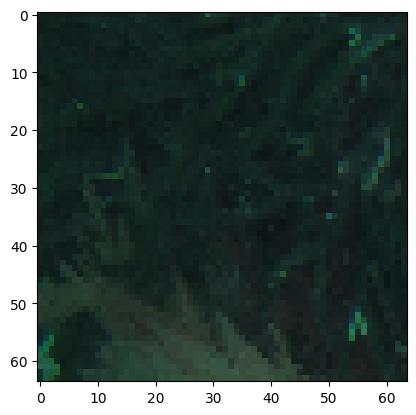

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {2: 0.9757042, 10: 0.024295807}
Example =  1


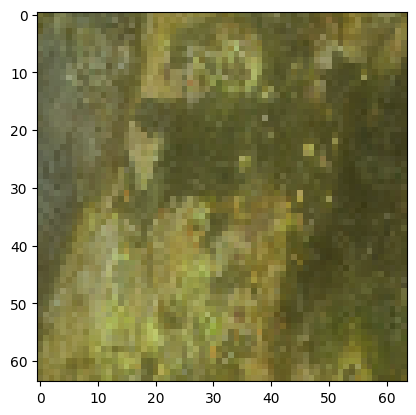

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {6: 0.89694804, 9: 0.103051975}
Example =  2


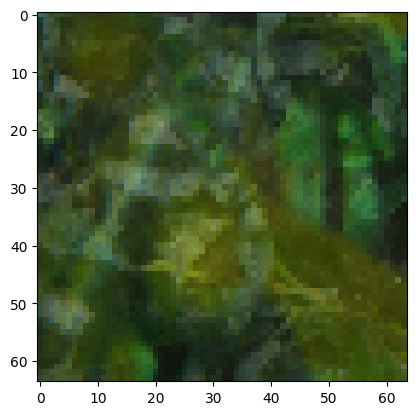

Coarse = {0: 1.0}
Medium = {6: 0.4112345, 7: 0.5887655}
Fine   = {25: 0.4112345, 33: 0.5887655}
Example =  3


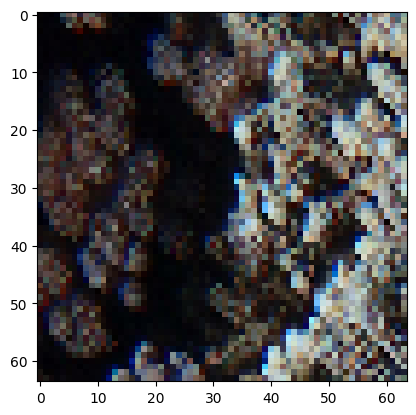

Coarse = {0: 1.0}
Medium = {1: 0.997926, 7: 0.0020740102}
Fine   = {32: 0.997926, 33: 0.0020740102}
Example =  4


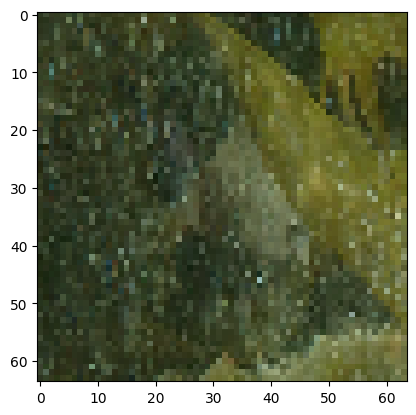

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  5


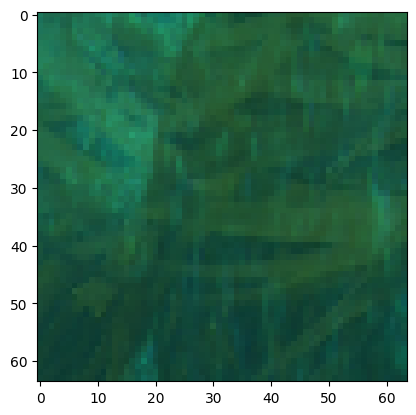

Coarse = {0: 1.0}
Medium = {1: 0.8058584, 7: 0.19414164}
Fine   = {32: 0.8058584, 33: 0.19414164}
Example =  6


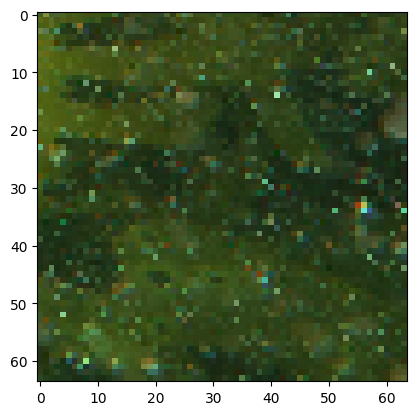

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.00035561394, 33: 0.9996444}
Example =  7


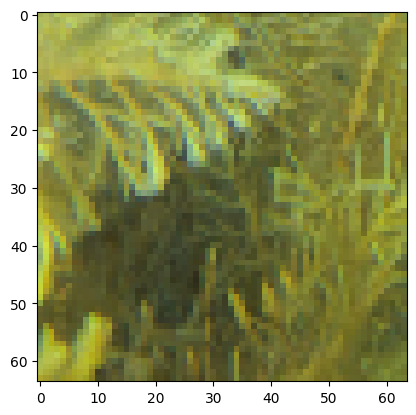

Coarse = {0: 0.8930709, 1: 0.10692913}
Medium = {7: 0.8930709, 9: 0.10692913}
Fine   = {15: 0.10692913, 33: 0.8930709}
Example =  8


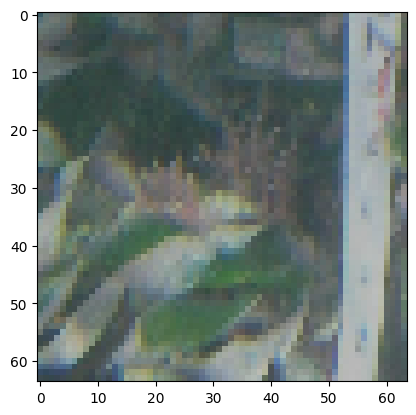

Coarse = {0: 1.0}
Medium = {6: 0.708028, 7: 0.29197198}
Fine   = {4: 0.29197198, 25: 0.708028}
Example =  9


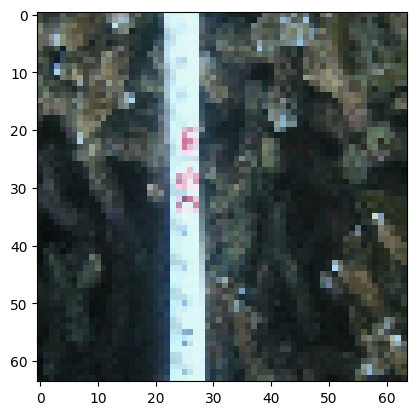

Coarse = {0: 0.034919977, 1: 0.96508}
Medium = {1: 0.034919977, 9: 0.96508}
Fine   = {32: 0.034919977, 37: 0.96508}
Example =  10


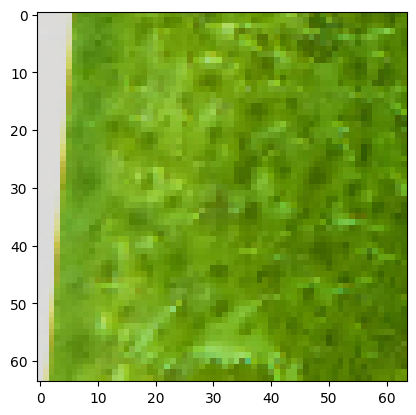

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  11


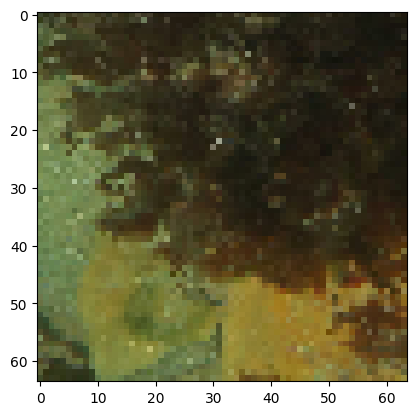

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.99350756, 10: 0.006492436}
Example =  12


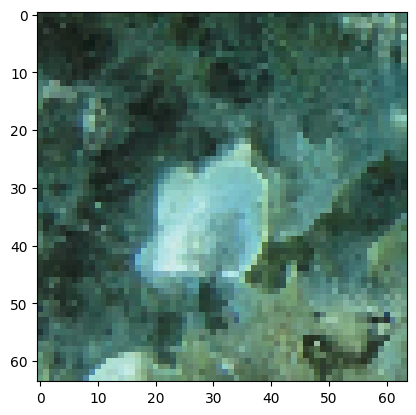

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.9383227, 33: 0.061677277}
Example =  13


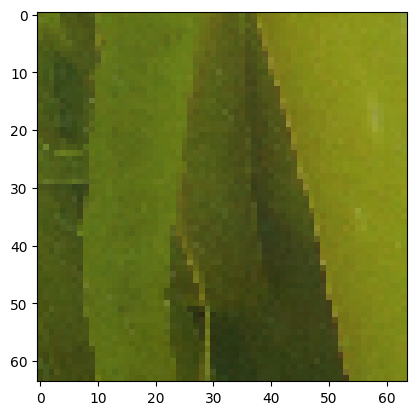

Coarse = {0: 0.8590207, 1: 0.14097932}
Medium = {7: 0.8590207, 9: 0.14097932}
Fine   = {15: 0.14097932, 33: 0.8590207}
Example =  14


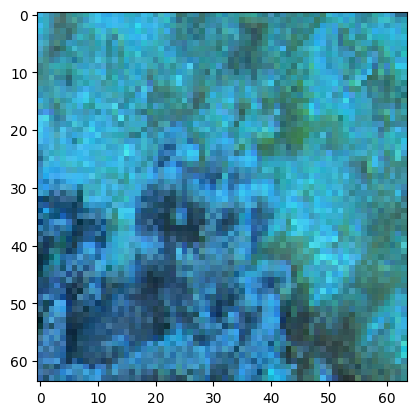

Coarse = {0: 1.0}
Medium = {1: 0.93962616, 7: 0.060373843}
Fine   = {32: 0.93962616, 33: 0.060373843}
Example =  15


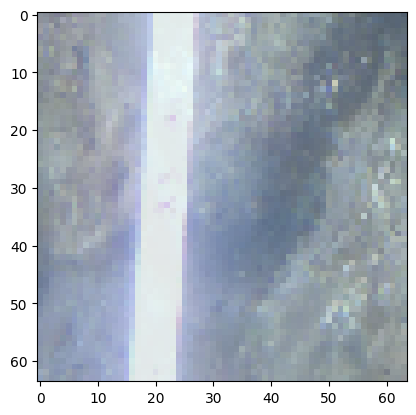

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.11760666, 36: 0.88239336}
Example =  16


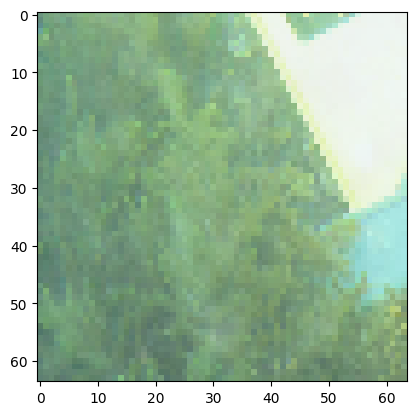

Coarse = {0: 1.0}
Medium = {6: 0.074539766, 7: 0.9254602}
Fine   = {0: 0.9254602, 25: 0.074539766}
Example =  17


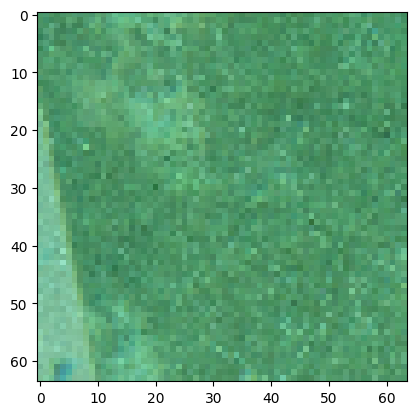

Coarse = {0: 0.4308967, 1: 0.5691033}
Medium = {7: 0.4308967, 9: 0.5691033}
Fine   = {10: 0.4308967, 15: 0.5691033}
Example =  18


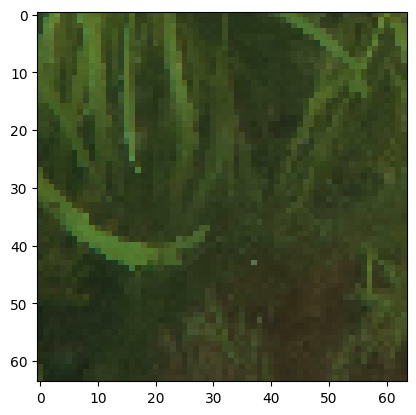

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 1.6181831e-08, 33: 1.0}
Example =  19


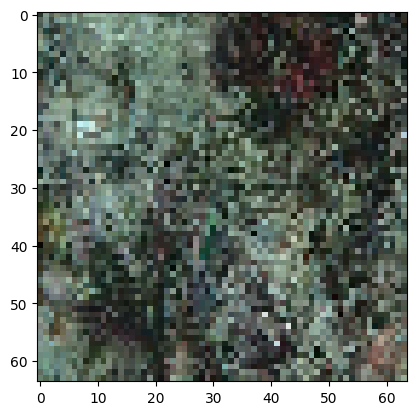

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  20


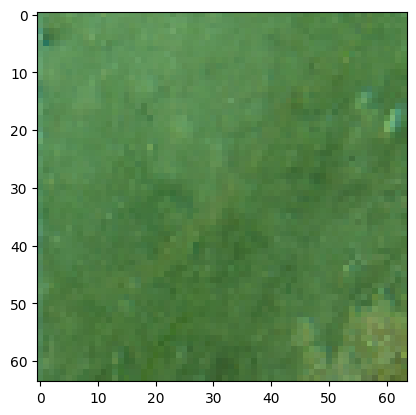

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.7229138, 33: 0.2770862}
Example =  21


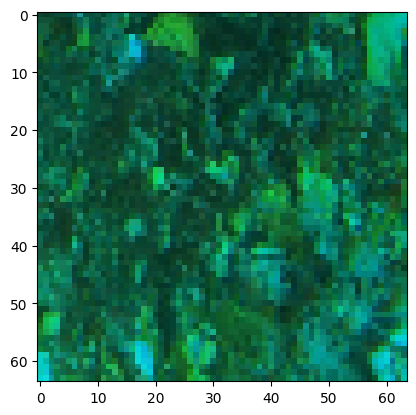

Coarse = {0: 1.0}
Medium = {1: 0.20264992, 7: 0.79735005}
Fine   = {4: 0.79735005, 21: 0.20264992}
Example =  22


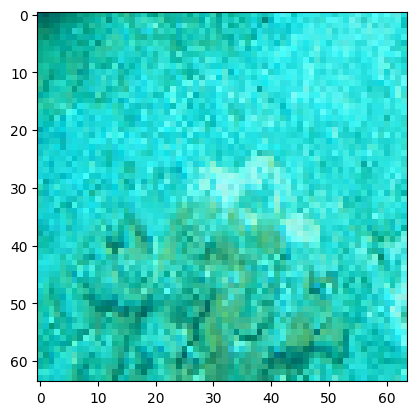

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 1.0}
Example =  23


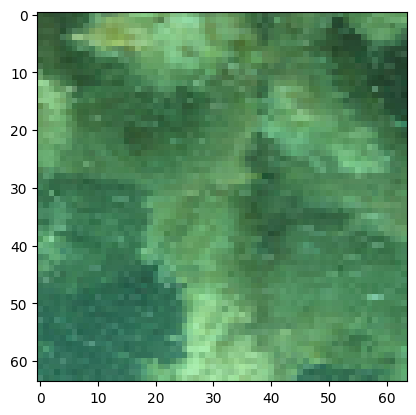

Coarse = {0: 0.99050933, 1: 0.009490653}
Medium = {7: 0.99050933, 9: 0.009490653}
Fine   = {11: 0.009490653, 33: 0.99050933}
Example =  24


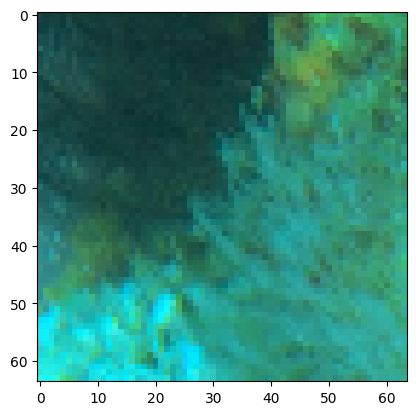

Coarse = {0: 1.0}
Medium = {1: 0.9999954, 7: 4.5895576e-06}
Fine   = {10: 4.5895576e-06, 22: 0.9999954}
Example =  25


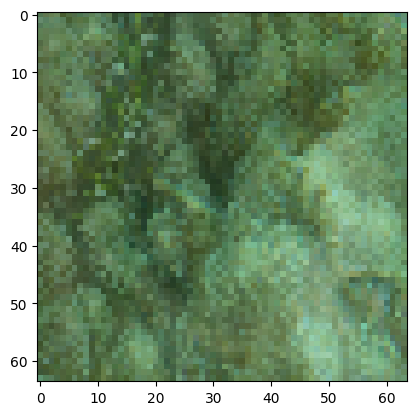

Coarse = {0: 1.0}
Medium = {1: 0.5086266, 7: 0.49137342}
Fine   = {32: 0.5086266, 33: 0.49137342}
Example =  26


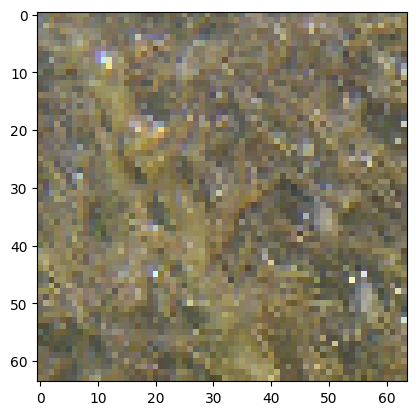

Coarse = {0: 0.9954305, 1: 0.0045694495}
Medium = {7: 0.9954305, 9: 0.0045694495}
Fine   = {0: 0.9954305, 37: 0.0045694495}
Example =  27


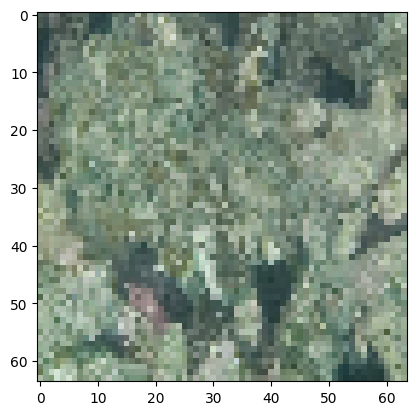

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.9976085, 33: 0.0023914918}
Example =  28


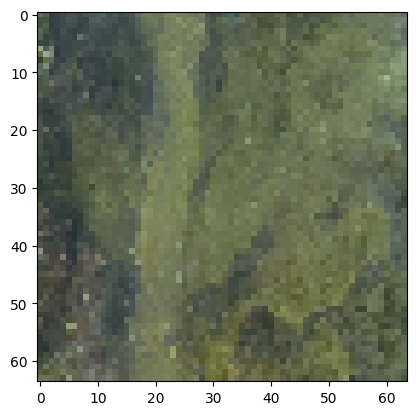

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.27276102, 33: 0.727239}
Example =  29


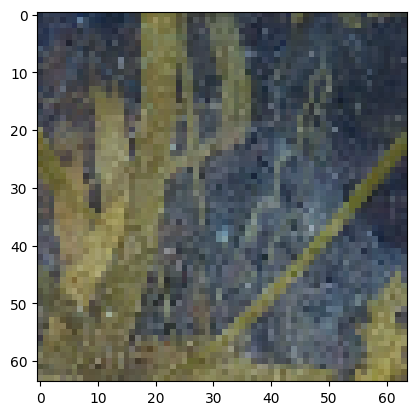

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.33387327, 33: 0.6661267}
Example =  30


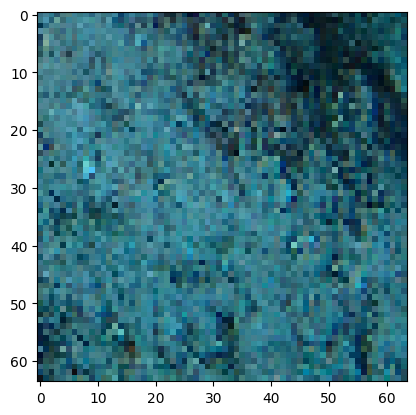

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.9999999, 34: 1.1920929e-07}
Example =  31


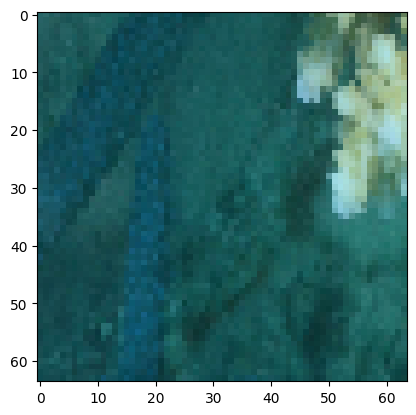

Coarse = {0: 0.00082463026, 1: 0.99917537}
Medium = {7: 0.00082463026, 9: 0.99917537}
Fine   = {15: 0.99917537, 33: 0.00082463026}
Example =  32


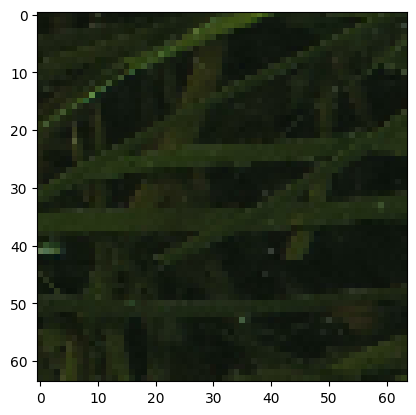

Coarse = {0: 1.0}
Medium = {1: 5.666507e-14, 7: 1.0}
Fine   = {32: 5.666507e-14, 33: 1.0}
Example =  33


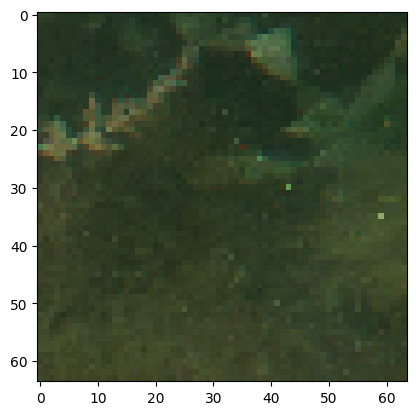

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.9352607, 33: 0.06473929}
Example =  34


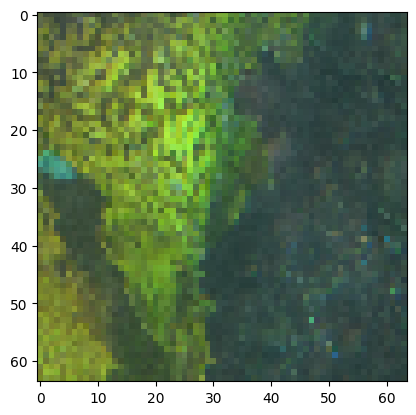

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  35


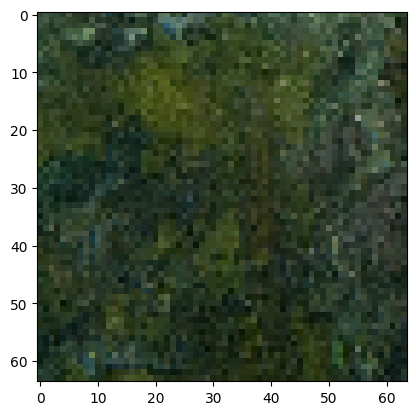

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.35956946, 33: 0.64043057}
Example =  36


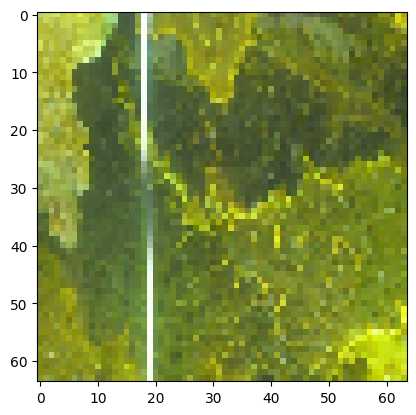

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  37


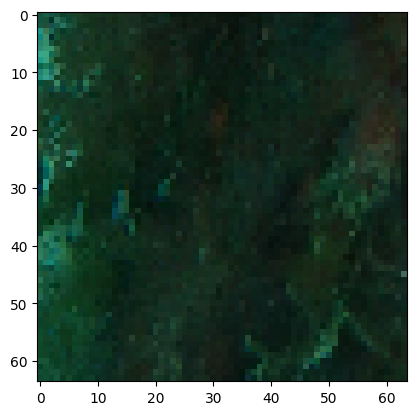

Coarse = {0: 0.8621848, 1: 0.13781516}
Medium = {7: 0.8621848, 9: 0.13781516}
Fine   = {4: 0.8621848, 12: 0.13781516}
Example =  38


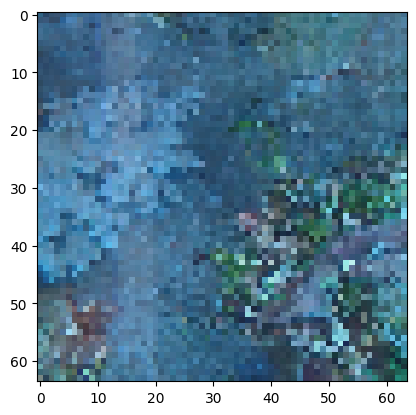

Coarse = {0: 1.0}
Medium = {1: 0.7853765, 6: 0.2146235}
Fine   = {25: 0.2146235, 32: 0.7853765}
Example =  39


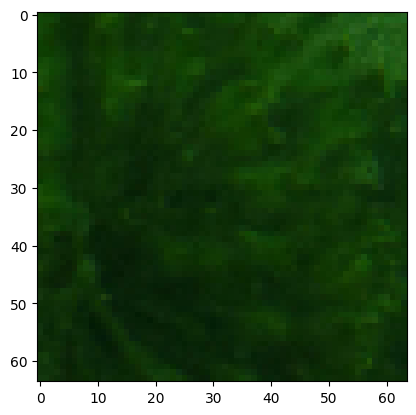

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.011351287, 2: 0.9886487}
Example =  40


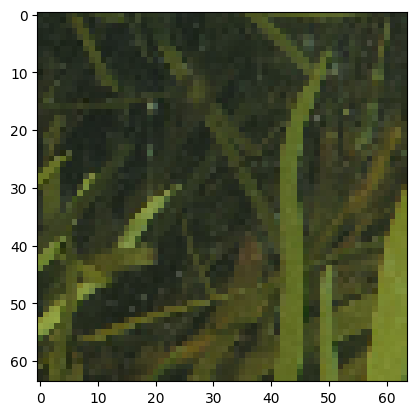

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {2: 0.08199257, 33: 0.91800743}
Example =  41


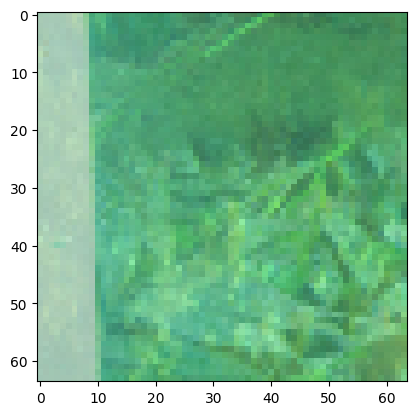

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.50172615, 33: 0.49827385}
Example =  42


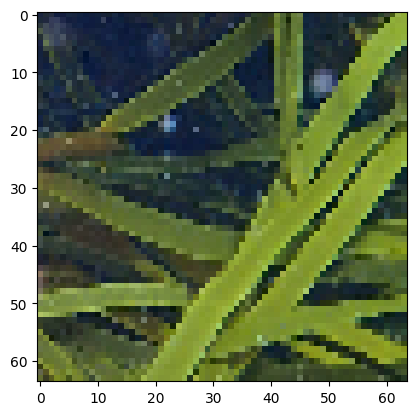

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  43


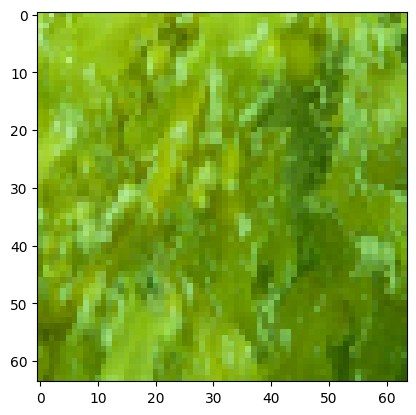

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.0005051529, 33: 0.99949485}
Example =  44


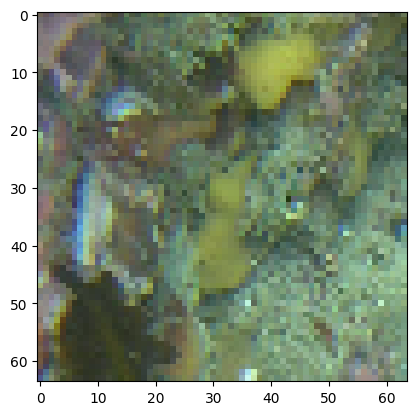

Coarse = {0: 1.0}
Medium = {0: 0.95242554, 6: 0.04757446}
Fine   = {25: 0.04757446, 28: 0.95242554}
Example =  45


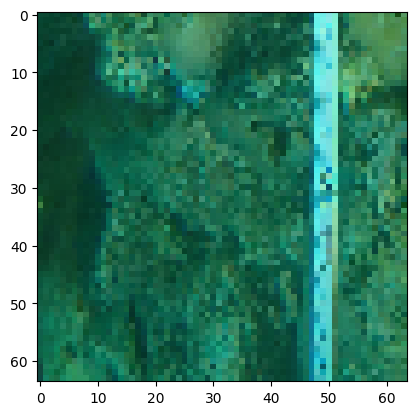

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {14: 0.92846185, 15: 0.07153815}
Example =  46


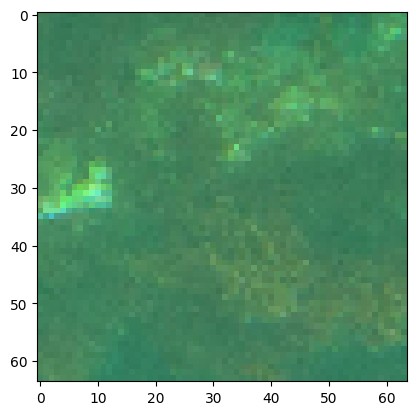

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {1: 0.9992752, 33: 0.00072480994}
Example =  47


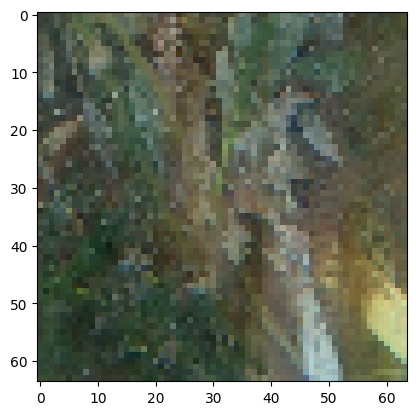

Coarse = {0: 0.7441616, 1: 0.2558384}
Medium = {6: 0.7441616, 9: 0.2558384}
Fine   = {15: 0.2558384, 25: 0.7441616}
Example =  48


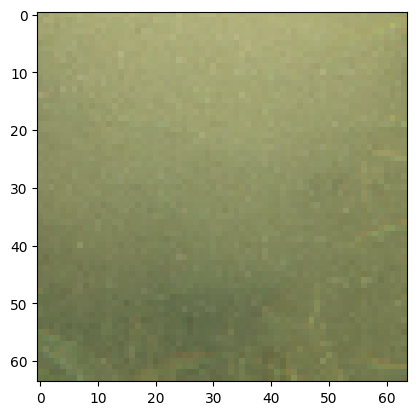

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {15: 1.0}
Example =  49


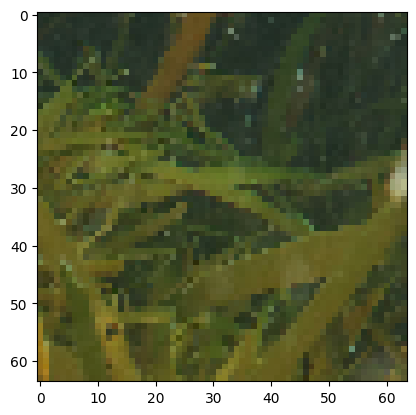

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.0047329664, 33: 0.99526703}
Example =  50


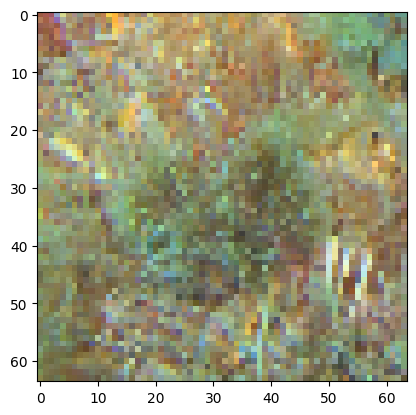

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.9939656, 10: 0.0060343742}
Example =  51


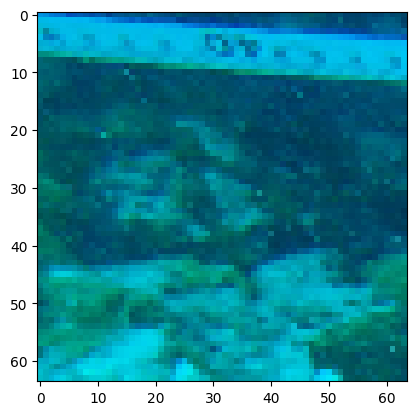

Coarse = {0: 1.0}
Medium = {0: 0.99747837, 6: 0.0025216257}
Fine   = {25: 0.0025216257, 28: 0.99747837}
Example =  52


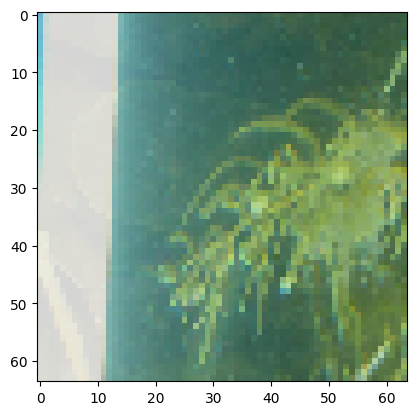

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  53


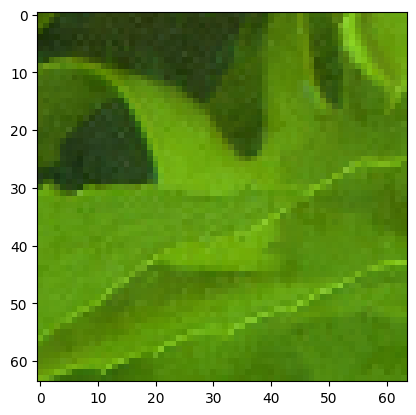

Coarse = {0: 1.0}
Medium = {1: 0.10271462, 7: 0.8972854}
Fine   = {32: 0.10271462, 33: 0.8972854}
Example =  54


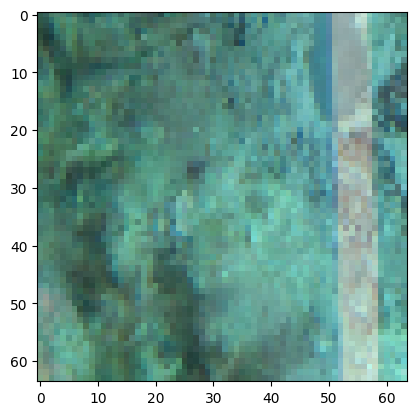

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.35421455, 10: 0.64578545}
Example =  55


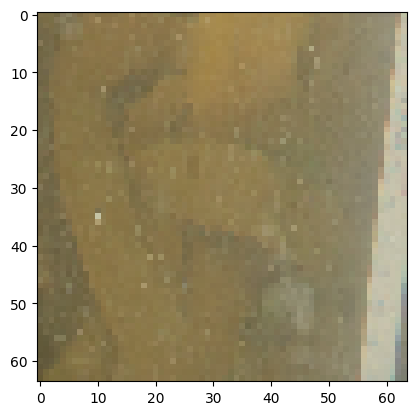

Coarse = {0: 0.45296797, 1: 0.547032}
Medium = {7: 0.45296797, 9: 0.547032}
Fine   = {15: 0.547032, 33: 0.45296797}
Example =  56


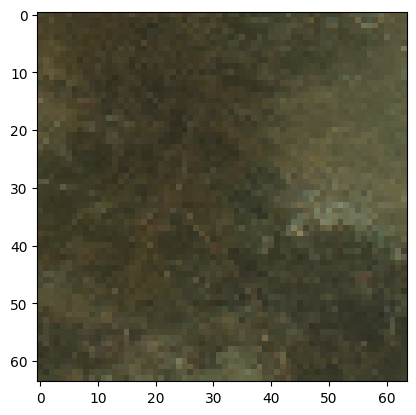

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.724703, 33: 0.275297}
Example =  57


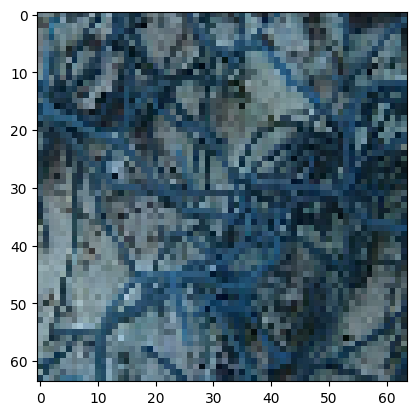

Coarse = {0: 1.0}
Medium = {0: 0.9886822, 7: 0.01131779}
Fine   = {29: 0.9886822, 33: 0.01131779}
Example =  58


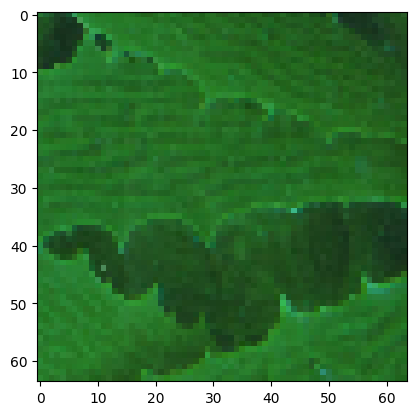

Coarse = {0: 1.0}
Medium = {1: 0.11601683, 6: 0.8839832}
Fine   = {25: 0.8839832, 32: 0.11601683}
Example =  59


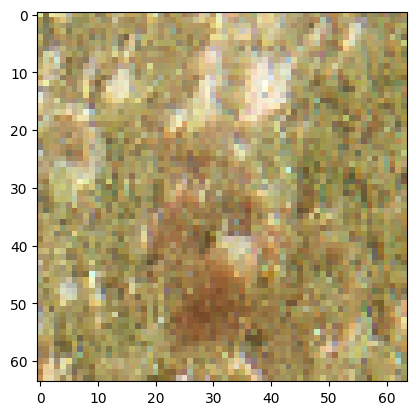

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.99824303, 33: 0.0017569932}
Example =  60


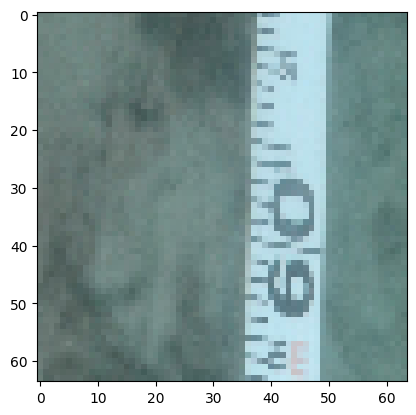

Coarse = {0: 0.0012775436, 1: 0.99872243}
Medium = {7: 0.0012775436, 9: 0.99872243}
Fine   = {33: 0.0012775436, 37: 0.99872243}
Example =  61


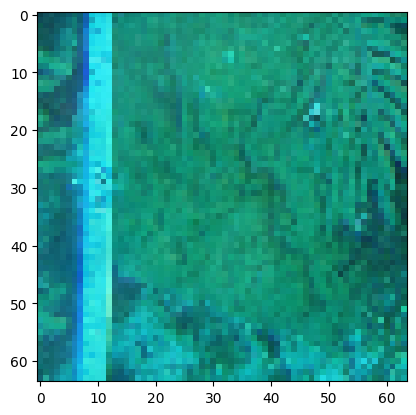

Coarse = {0: 1.0}
Medium = {1: 0.7847028, 7: 0.21529722}
Fine   = {32: 0.7847028, 34: 0.21529722}
Example =  62


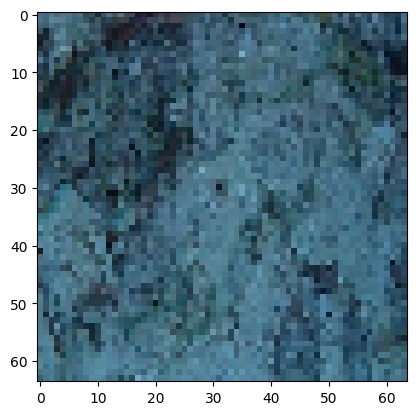

Coarse = {0: 0.0009646416, 1: 0.99903536}
Medium = {7: 0.0009646416, 9: 0.99903536}
Fine   = {15: 0.99903536, 33: 0.0009646416}
Example =  63


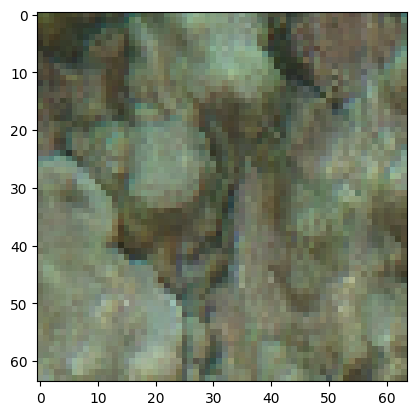

Coarse = {0: 1.0}
Medium = {1: 1.0}
Fine   = {32: 1.0}
Example =  64


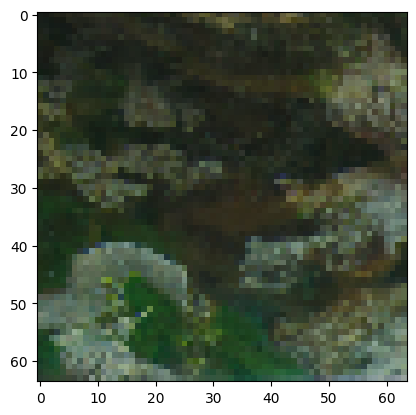

Coarse = {0: 1.0}
Medium = {1: 0.5794168, 7: 0.4205832}
Fine   = {32: 0.5794168, 33: 0.4205832}
Example =  65


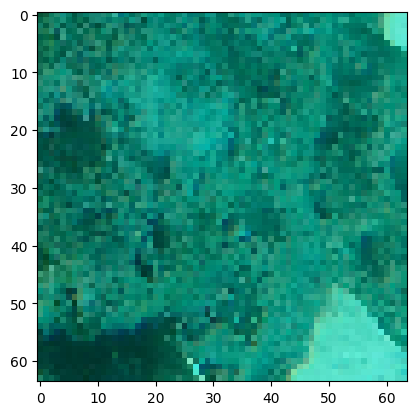

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {2: 0.002239108, 10: 0.9977609}
Example =  66


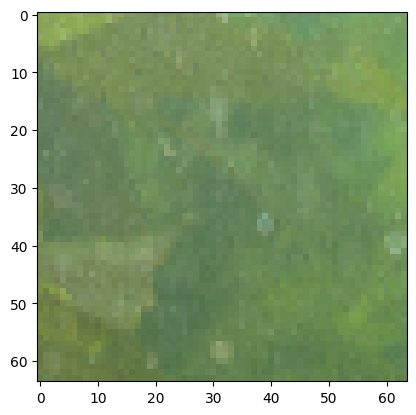

Coarse = {0: 0.9999799, 1: 2.0061041e-05}
Medium = {7: 0.9999799, 9: 2.0061041e-05}
Fine   = {15: 2.0061041e-05, 33: 0.9999799}
Example =  67


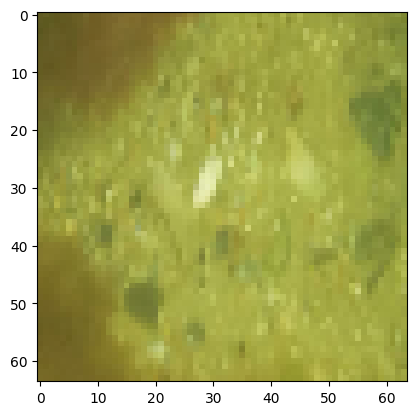

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {15: 1.0}
Example =  68


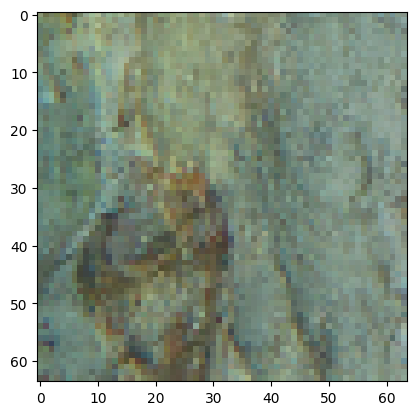

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.69393635, 33: 0.30606368}
Example =  69


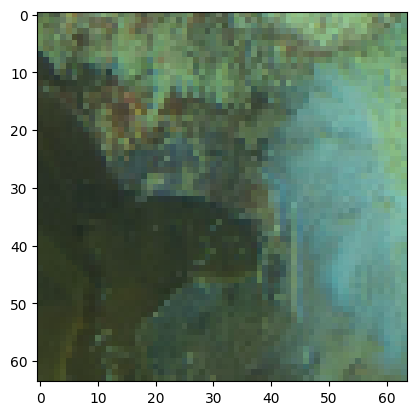

Coarse = {0: 1.0}
Medium = {0: 0.85726017, 7: 0.14273983}
Fine   = {28: 0.85726017, 33: 0.14273983}
Example =  70


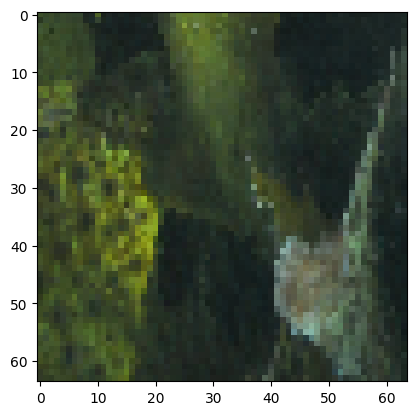

Coarse = {0: 1.0}
Medium = {1: 0.060745716, 7: 0.9392543}
Fine   = {32: 0.060745716, 33: 0.9392543}
Example =  71


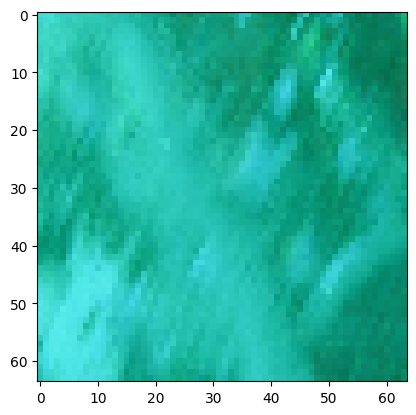

Coarse = {0: 1.0}
Medium = {0: 0.110424064, 7: 0.88957596}
Fine   = {7: 0.88957596, 28: 0.110424064}
Example =  72


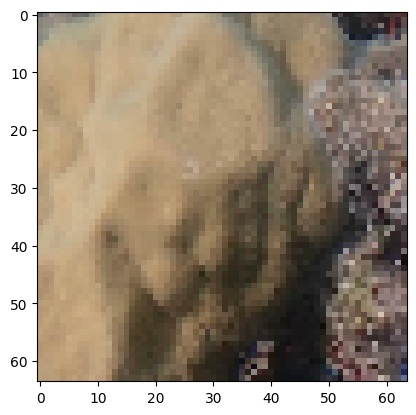

Coarse = {0: 1.0}
Medium = {1: 0.9990106, 7: 0.0009893775}
Fine   = {32: 0.9990106, 33: 0.0009893775}
Example =  73


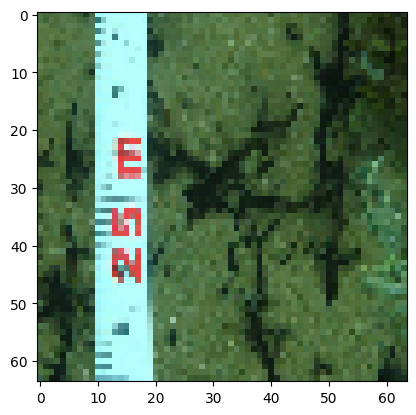

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.9999926, 33: 7.377015e-06}
Example =  74


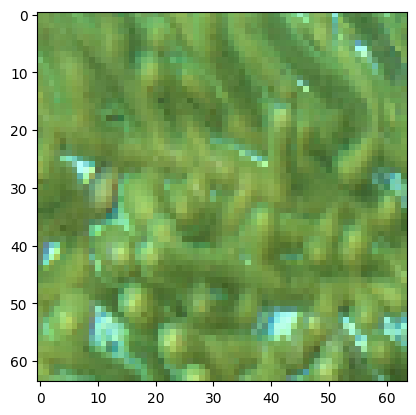

Coarse = {0: 1.0}
Medium = {0: 6.475374e-05, 1: 0.99993527}
Fine   = {28: 6.475374e-05, 32: 0.99993527}
Example =  75


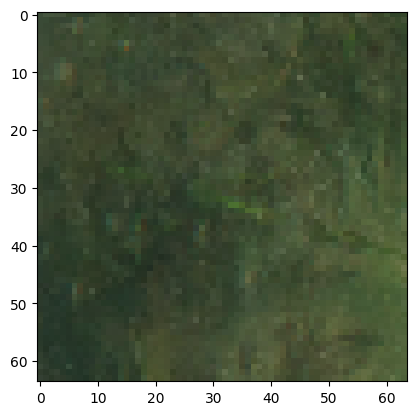

Coarse = {0: 1.0}
Medium = {6: 0.7429229, 7: 0.25707713}
Fine   = {4: 0.25707713, 25: 0.7429229}
Example =  76


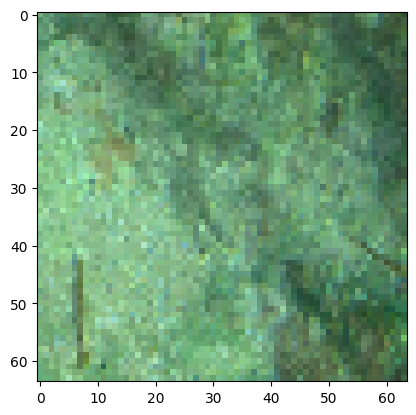

Coarse = {0: 0.3200811, 1: 0.6799189}
Medium = {7: 0.3200811, 9: 0.6799189}
Fine   = {7: 0.3200811, 14: 0.6799189}
Example =  77


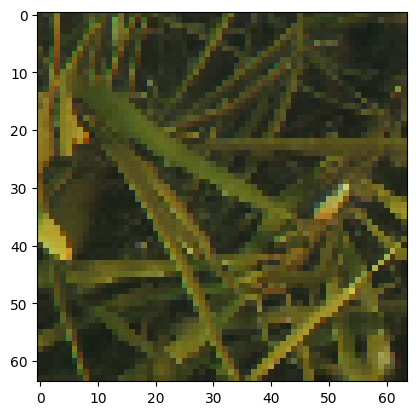

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  78


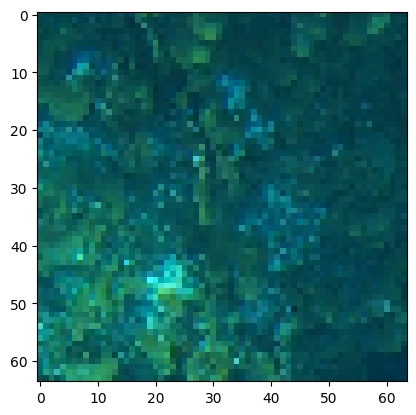

Coarse = {0: 0.9999997, 1: 2.9802322e-07}
Medium = {7: 0.9999997, 9: 2.9802322e-07}
Fine   = {0: 0.9999997, 15: 2.9802322e-07}
Example =  79


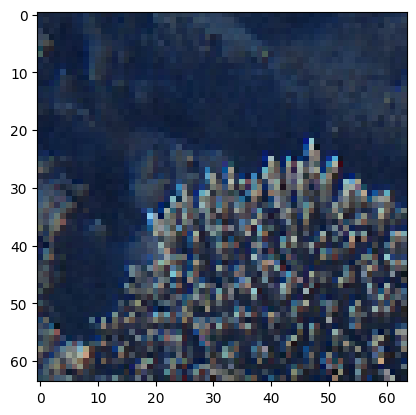

Coarse = {0: 1.0}
Medium = {1: 0.9835908, 7: 0.01640922}
Fine   = {10: 0.01640922, 32: 0.9835908}
Example =  80


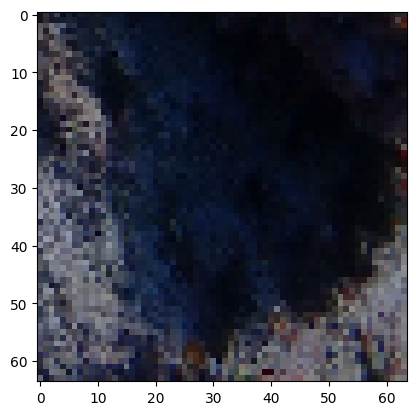

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.9981945, 33: 0.0018054843}
Example =  81


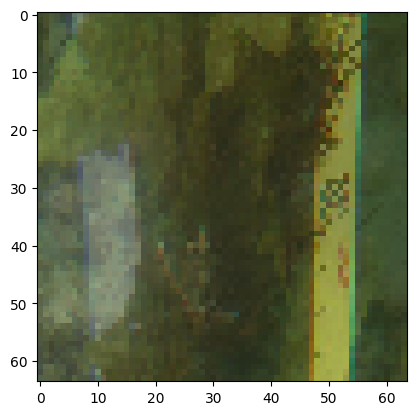

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  82


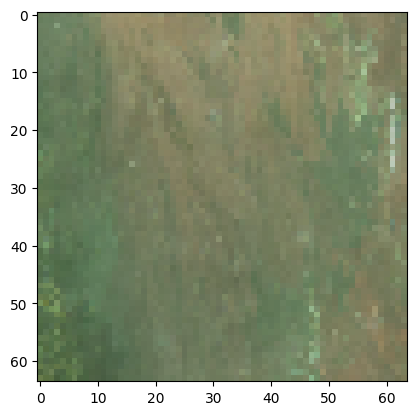

Coarse = {0: 0.52105117, 1: 0.4789488}
Medium = {7: 0.52105117, 9: 0.4789488}
Fine   = {4: 0.52105117, 15: 0.4789488}
Example =  83


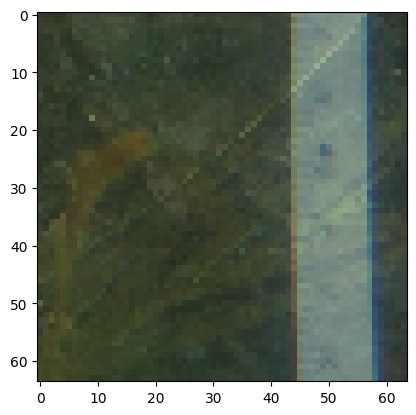

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  84


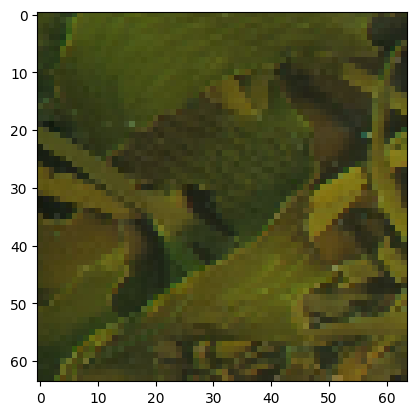

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.061641455, 33: 0.93835855}
Example =  85


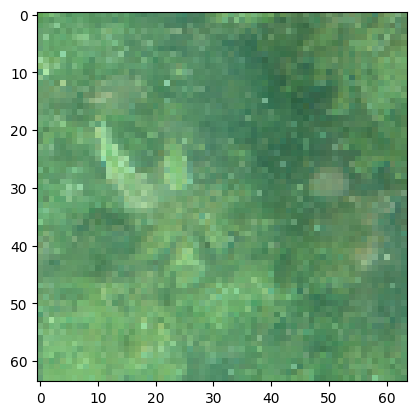

Coarse = {0: 0.72855735, 1: 0.27144265}
Medium = {7: 0.72855735, 9: 0.27144265}
Fine   = {1: 0.72855735, 15: 0.27144265}
Example =  86


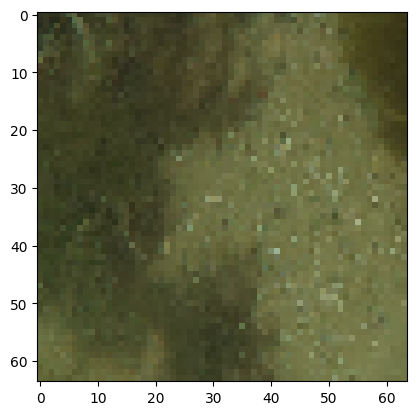

Coarse = {0: 0.0021539927, 1: 0.997846}
Medium = {7: 0.0021539927, 9: 0.997846}
Fine   = {15: 0.997846, 33: 0.0021539927}
Example =  87


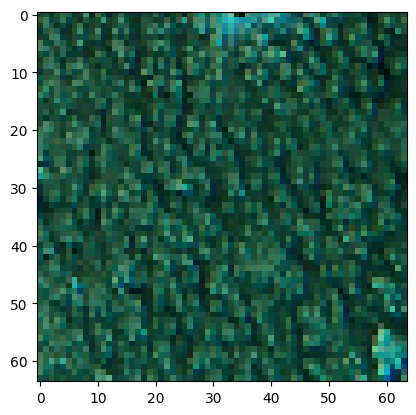

Coarse = {0: 1.0}
Medium = {1: 0.9999998, 7: 1.9323683e-07}
Fine   = {10: 1.9323683e-07, 32: 0.9999998}
Example =  88


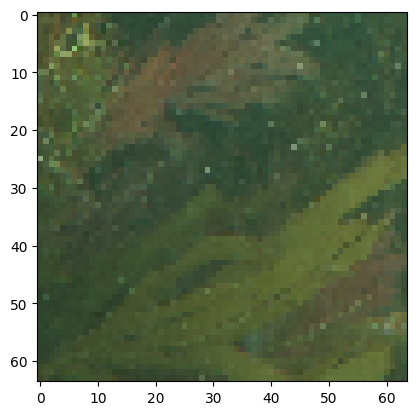

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  89


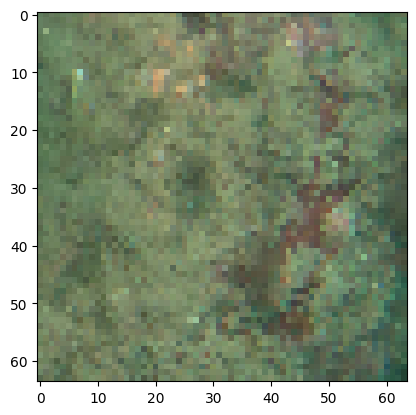

Coarse = {0: 0.006446796, 1: 0.9935532}
Medium = {7: 0.006446796, 9: 0.9935532}
Fine   = {15: 0.9935532, 34: 0.006446796}
Example =  90


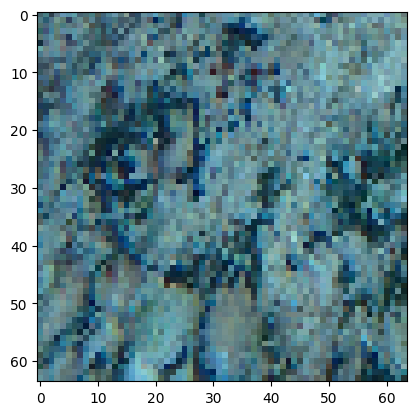

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  91


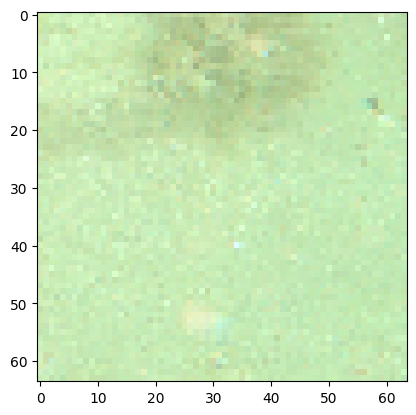

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {15: 0.99995714, 37: 4.285574e-05}
Example =  92


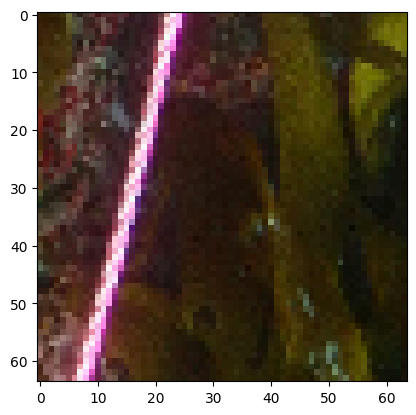

Coarse = {0: 1.0}
Medium = {1: 0.001466155, 7: 0.99853384}
Fine   = {32: 0.001466155, 33: 0.99853384}
Example =  93


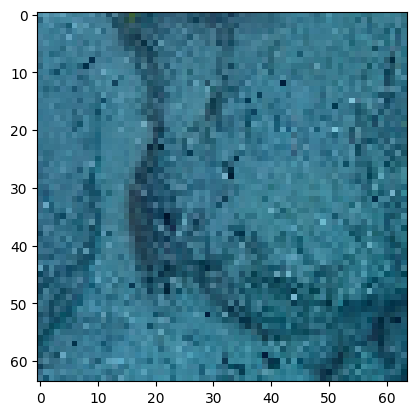

Coarse = {0: 1.0}
Medium = {1: 0.0017462791, 7: 0.9982537}
Fine   = {10: 0.9982537, 32: 0.0017462791}
Example =  94


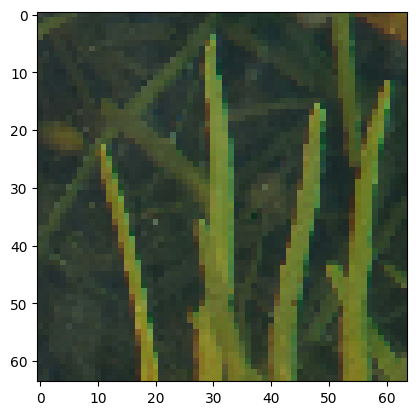

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.062170386, 33: 0.9378296}
Example =  95


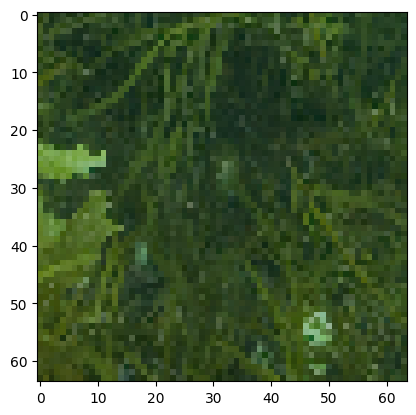

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {1: 0.1443612, 33: 0.8556388}
Example =  96


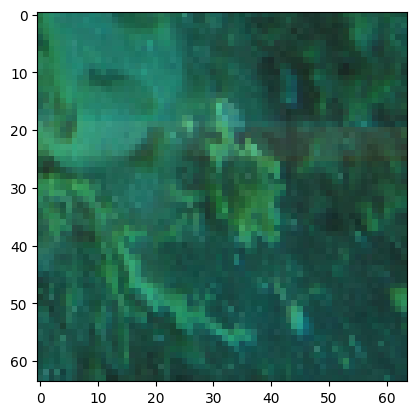

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.8765356, 33: 0.123464406}
Example =  97


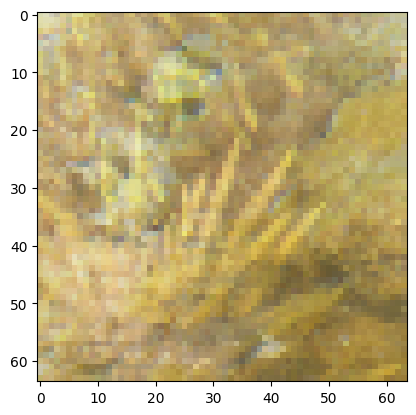

Coarse = {0: 1.0}
Medium = {1: 0.44199765, 7: 0.55800235}
Fine   = {32: 0.44199765, 33: 0.55800235}
Example =  98


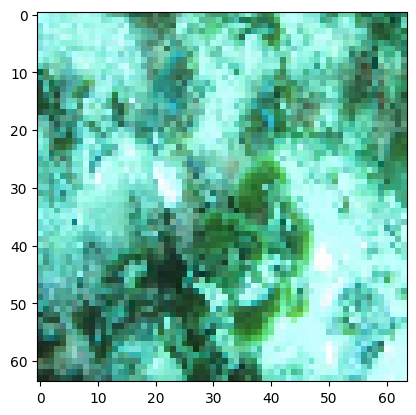

Coarse = {0: 0.9999988, 1: 1.1920929e-06}
Medium = {7: 0.9999988, 9: 1.1920929e-06}
Fine   = {0: 0.9999988, 15: 1.1920929e-06}
Example =  99


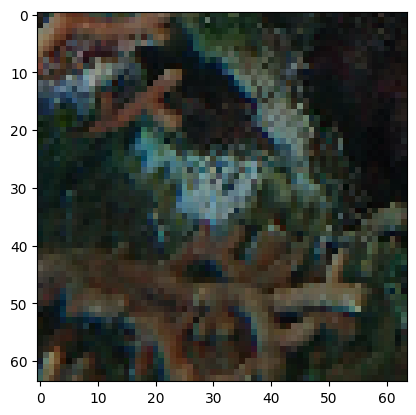

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {5: 0.04568919, 7: 0.95431083}
Example =  100


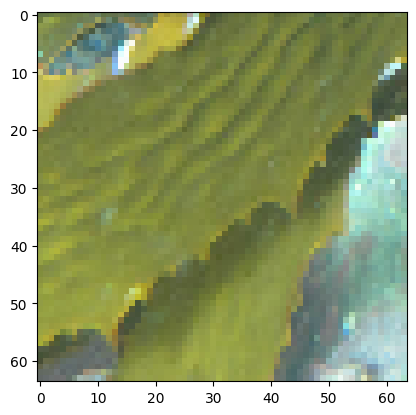

Coarse = {0: 0.98265624, 1: 0.017343761}
Medium = {7: 0.98265624, 9: 0.017343761}
Fine   = {15: 0.017343761, 33: 0.98265624}
Example =  101


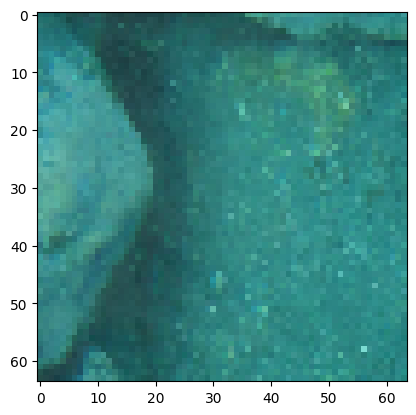

Coarse = {0: 0.8188908, 1: 0.18110919}
Medium = {7: 0.8188908, 9: 0.18110919}
Fine   = {10: 0.8188908, 15: 0.18110919}
Example =  102


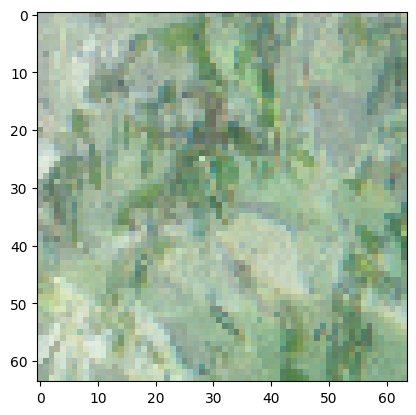

Coarse = {0: 1.0}
Medium = {6: 1.0}
Fine   = {24: 0.67219955, 25: 0.32780045}
Example =  103


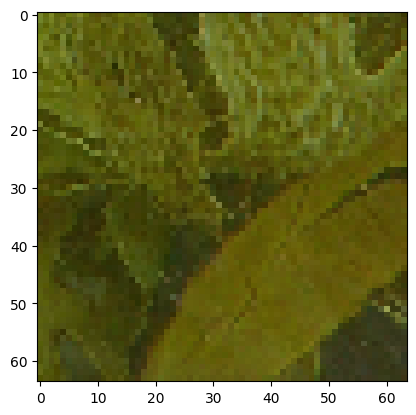

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  104


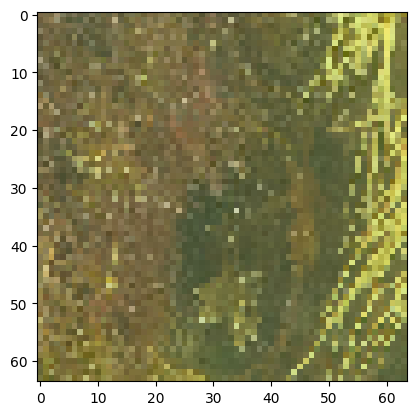

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  105


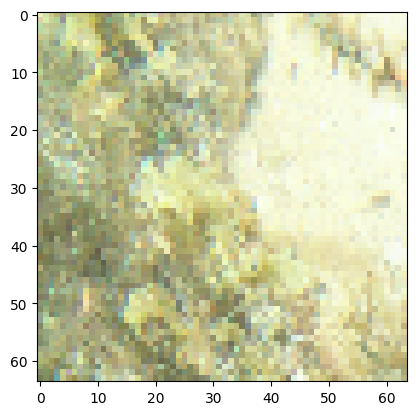

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.033402734, 33: 0.96659726}
Example =  106


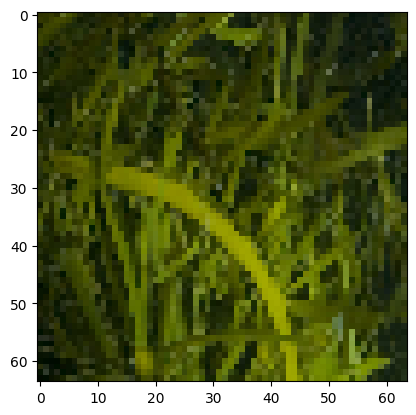

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  107


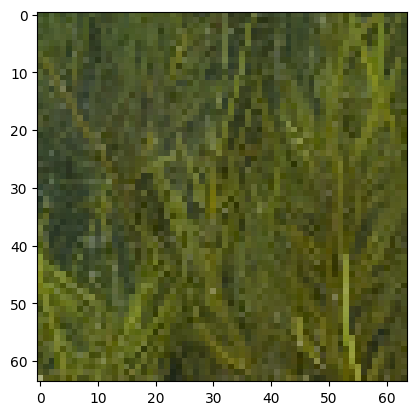

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.06750828, 33: 0.9324917}
Example =  108


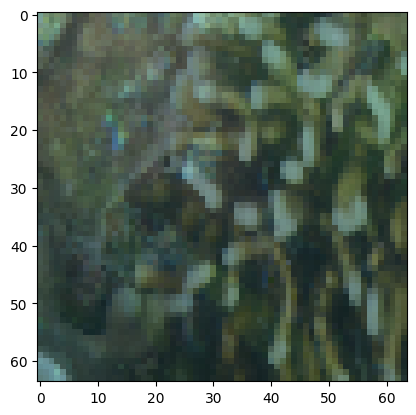

Coarse = {0: 1.0}
Medium = {1: 0.5869532, 7: 0.41304678}
Fine   = {6: 0.41304678, 32: 0.5869532}
Example =  109


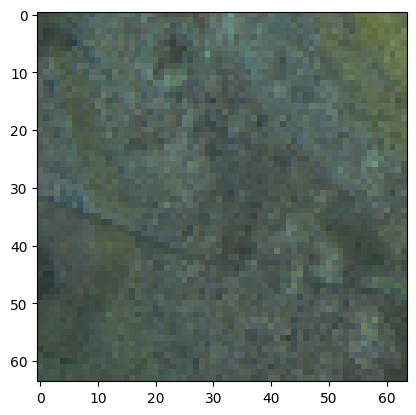

Coarse = {0: 0.62395895, 1: 0.37604105}
Medium = {7: 0.62395895, 9: 0.37604105}
Fine   = {6: 0.62395895, 15: 0.37604105}
Example =  110


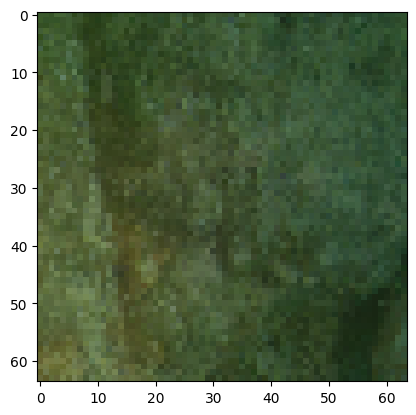

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {2: 0.6047939, 10: 0.3952061}
Example =  111


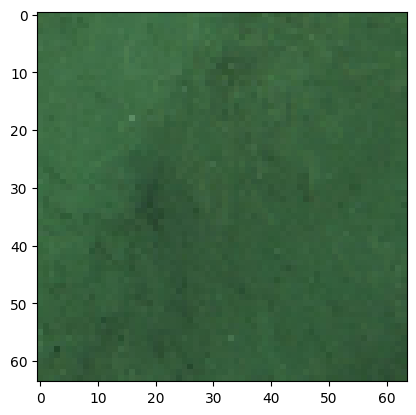

Coarse = {0: 0.076656744, 1: 0.92334324}
Medium = {7: 0.076656744, 9: 0.92334324}
Fine   = {15: 0.92334324, 33: 0.076656744}
Example =  112


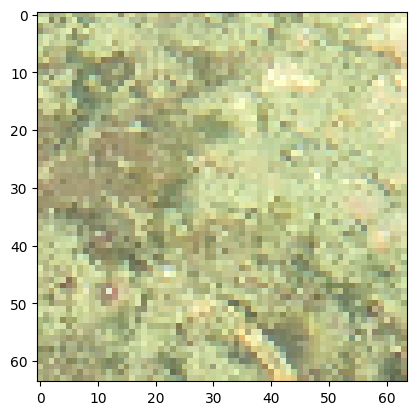

Coarse = {0: 0.99999946, 1: 5.411341e-07}
Medium = {7: 0.99999946, 9: 5.411341e-07}
Fine   = {10: 0.99999946, 11: 5.411341e-07}
Example =  113


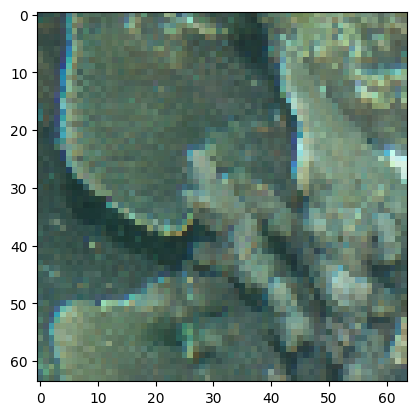

Coarse = {0: 1.0}
Medium = {1: 0.9044684, 7: 0.09553158}
Fine   = {32: 0.9044684, 33: 0.09553158}
Example =  114


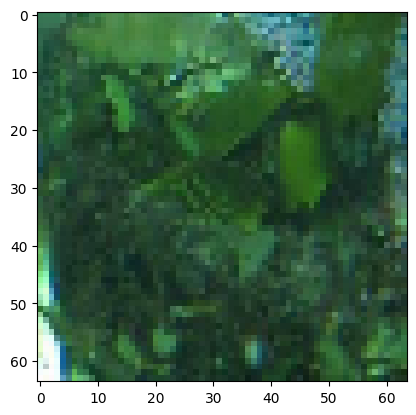

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  115


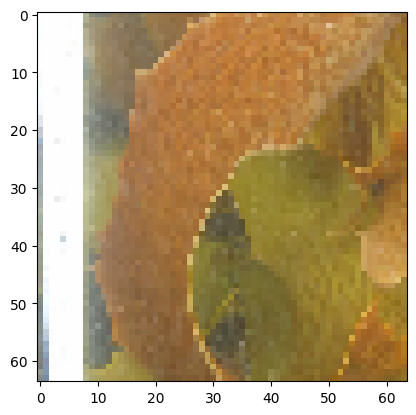

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.000587821, 33: 0.9994122}
Example =  116


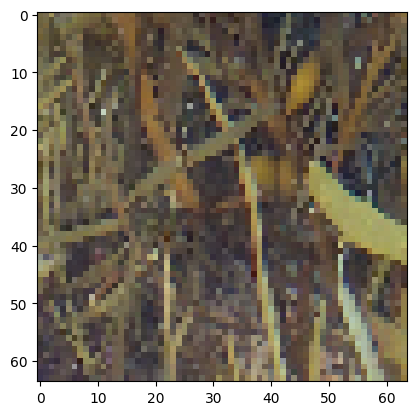

Coarse = {0: 0.8412668, 1: 0.15873319}
Medium = {7: 0.8412668, 9: 0.15873319}
Fine   = {33: 0.8412668, 37: 0.15873319}
Example =  117


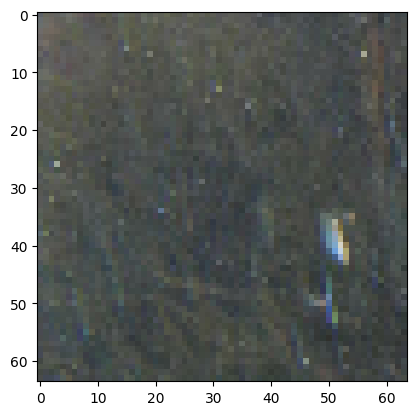

Coarse = {0: 0.99992746, 1: 7.253885e-05}
Medium = {7: 0.99992746, 9: 7.253885e-05}
Fine   = {15: 7.253885e-05, 33: 0.99992746}
Example =  118


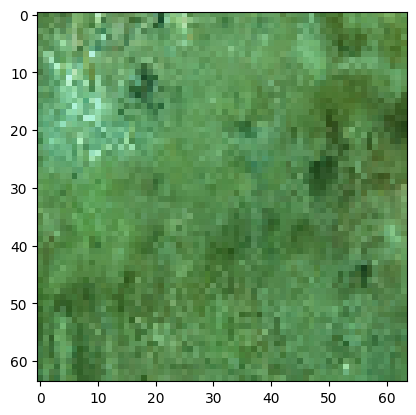

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 0.075486496, 36: 0.9245135}
Example =  119


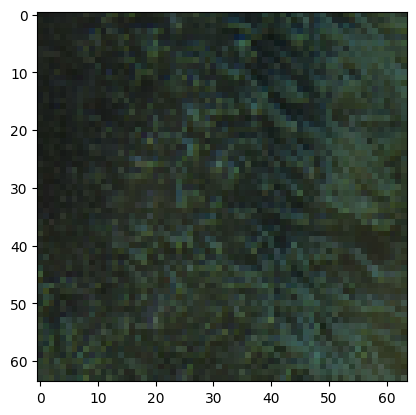

Coarse = {0: 0.93518144, 1: 0.06481858}
Medium = {1: 0.93518144, 9: 0.06481858}
Fine   = {15: 0.06481858, 27: 0.93518144}
Example =  120


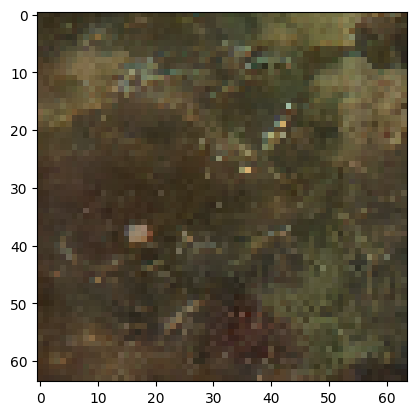

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.90505064, 7: 0.094949335}
Example =  121


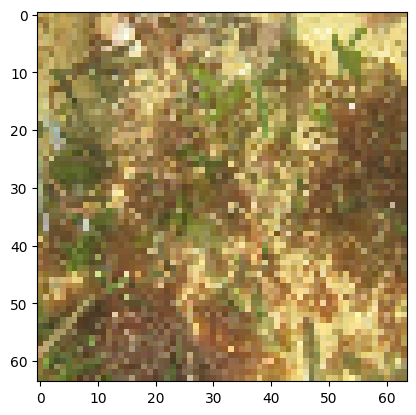

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.9999861, 34: 1.3868885e-05}
Example =  122


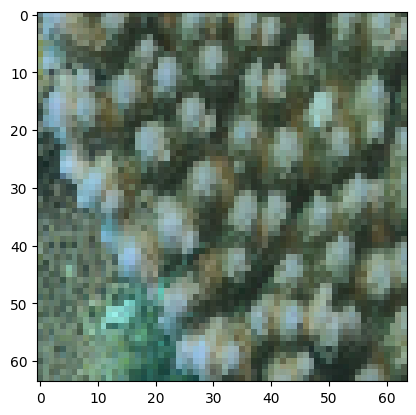

Coarse = {0: 1.0}
Medium = {1: 0.9876185, 7: 0.012381515}
Fine   = {10: 0.012381515, 32: 0.9876185}
Example =  123


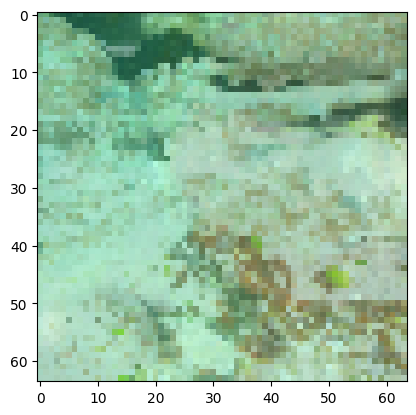

Coarse = {0: 1.0}
Medium = {1: 0.66250384, 7: 0.33749616}
Fine   = {10: 0.33749616, 32: 0.66250384}
Example =  124


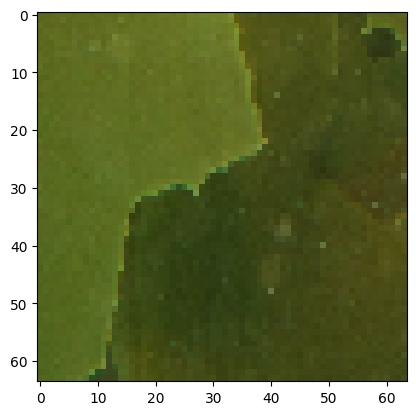

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.017750084, 33: 0.9822499}
Example =  125


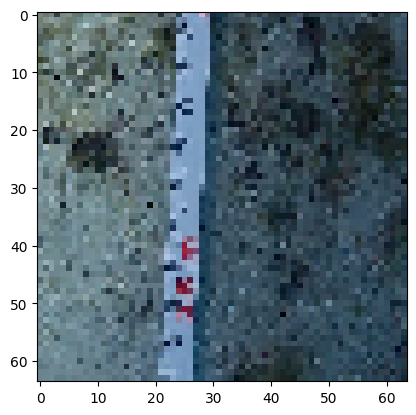

Coarse = {0: 0.00016963482, 1: 0.99983037}
Medium = {7: 0.00016963482, 9: 0.99983037}
Fine   = {10: 0.00016963482, 15: 0.99983037}
Example =  126


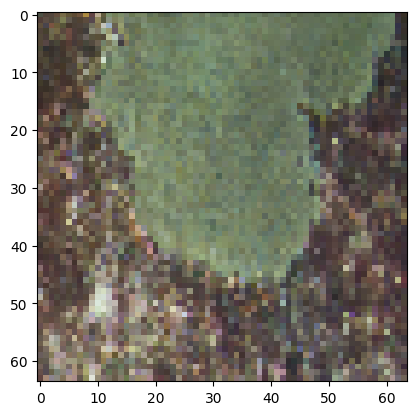

Coarse = {0: 1.0}
Medium = {1: 0.92867535, 7: 0.07132465}
Fine   = {32: 0.92867535, 33: 0.07132465}
Example =  127


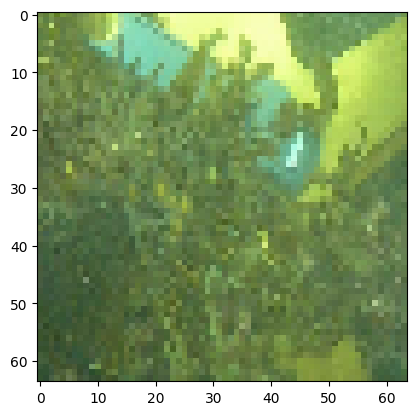

Coarse = {0: 0.9999947, 1: 5.3048134e-06}
Medium = {7: 0.9999947, 9: 5.3048134e-06}
Fine   = {15: 5.3048134e-06, 33: 0.9999947}


In [7]:
for x,y in dataset.train_dataset.take(1):
    for i in range(len(x)):
        print('Example = ', i)
        plt.imshow(x[i])
        plt.show()
        print('Coarse =', {k:v for k,v in enumerate(y[0][i].numpy()) if v != 0}) # coarse lables
        print('Medium =', {k:v for k,v in enumerate(y[1][i].numpy()) if v != 0}) # medium lables
        print('Fine   =', {k:v for k,v in enumerate(y[2][i].numpy()) if v != 0}) # fine lables

In [8]:
for x,y in dataset.train_dataset.take(1):
    image_shape = x.shape[1:]
    coarse_label_shape = y[0].shape[1:]
    medium_label_shape = y[1].shape[1:]
    fine_label_shape = y[2].shape[1:]

## Learning Rate Decay Scheduler

In [9]:
def scheduler(epoch):
    learning_rate_init = train_params["lr"]
    
    if epoch > train_params["decay_exe"]:
        learning_rate_init = train_params["lr"] * (train_params["lr_decay"] ** (epoch-9))
        
    tf.summary.scalar('learning rate', data=learning_rate_init, step=epoch)
        
    return learning_rate_init

# Model Architecture

## Loss Function

In [10]:
coarse_class, medium_class, fine_class = dataset.num_classes

## For Dynamic LossWeights
initial_lw = models.initial_lw({"coarse": coarse_class,
                                 "medium": medium_class,
                                 "fine": fine_class})

lossweight = {'coarse_lw' : K.variable(value = initial_lw['coarse'], dtype="float32", name="coarse_lw"),
             'medium_lw' : K.variable(value = initial_lw['medium'], dtype="float32", name="medium_lw"),
             'fine_lw' : K.variable(value = initial_lw['fine'], dtype="float32", name="fine_lw"),
              'decoder_lw' : 0.0
             }

In [11]:
def margin_loss(y_true, y_proba):
    
    present_error_raw = tf.square(tf.maximum(0., 0.9 - y_proba), name="present_error_raw")
    absent_error_raw = tf.square(tf.maximum(0., y_proba - 0.1), name="absent_error_raw")
    L = tf.add(y_true * present_error_raw, 0.5 * (1.0 - y_true) * absent_error_raw,name="L")
    total_marginloss = tf.reduce_sum(L, axis=1, name="margin_loss")

    return total_marginloss


def CustomLoss(y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f, LW_C, LW_M, LW_F):
    
    ML_c = margin_loss(y_true_c, y_pred_c)*LW_C
    ML_m = margin_loss(y_true_m, y_pred_m)*LW_M
    ML_f = margin_loss(y_true_f, y_pred_f)*LW_F
    
    batch_loss = ML_c + ML_m+ ML_f

    return tf.reduce_mean(batch_loss)

## Architecture

In [12]:
def get_compiled_model():
    
    ## Calling the HD-CapsNet Model
    model = models.HD_CapsNet_Mod_3_3(input_shape     = image_shape, 
                                      input_shape_yc  = coarse_label_shape,
                                      input_shape_ym  = medium_label_shape,
                                      input_shape_yf  = fine_label_shape, 
                                      no_coarse_class = coarse_class, 
                                      no_medium_class = medium_class, 
                                      no_fine_class   = fine_class,
                                      PCap_n_dims     = 8, 
                                      SCap_f_dims     = 8, 
                                      SCap_m_dims     = 16, 
                                      SCap_c_dims     = 32)
    
    ## Saving Model Architecture
    keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)
    
    ## Add Loss for Model
    model.add_loss(CustomLoss(y_true_c            = model.inputs[1], 
                              y_true_m            = model.inputs[2], 
                              y_true_f            = model.inputs[3], 
                              y_pred_c            = model.output[0], 
                              y_pred_m            = model.output[1], 
                              y_pred_f            = model.output[2], 
                              LW_C                = lossweight['coarse_lw'], 
                              LW_M                = lossweight['medium_lw'], 
                              LW_F                = lossweight['fine_lw']
                             )
                  )
    
    ## Compile Model
    model.compile(optimizer='adam',                  
                  metrics={'prediction_fine': 'accuracy',
                           'prediction_medium': 'accuracy',
                           'prediction_coarse': 'accuracy'}
                 )
    return model

## Compile Model

In [13]:
model = get_compiled_model()

In [14]:
model.summary()
# keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)

Model: "HD-CapsNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Image (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 64)   1792        ['Input_Image[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['block1_conv1[0][0]']           
 alization)                                                                                       
                                                                                                  
 block1_conv2 (Conv2D)          (None, 64, 64, 64)   36928       ['batch_normalization[0]

                                                                                                  
 prediction_medium (LengthLayer  (None, 10)          0           ['s_caps_medium[0][0]']          
 )                                                                                                
                                                                                                  
 prediction_fine (LengthLayer)  (None, 38)           0           ['s_caps_fine[0][0]']            
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 2)            0           ['prediction_coarse[0][0]']      
                                                                                                  
 tf.math.subtract_1 (TFOpLambda  (None, 2)           0           ['prediction_coarse[0][0]']      
 )                                                                                                
          

 tf.math.multiply_8 (TFOpLambda  (None, 38)          0           ['input_yf[0][0]',               
 )                                                                'tf.math.square_4[0][0]']       
                                                                                                  
 tf.math.multiply_10 (TFOpLambd  (None, 38)          0           ['tf.math.multiply_9[0][0]',     
 a)                                                               'tf.math.square_5[0][0]']       
                                                                                                  
 tf.math.reduce_sum (TFOpLambda  (None,)             0           ['tf.math.add[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.reduce_sum_1 (TFOpLamb  (None,)             0           ['tf.math.add_1[0][0]']          
 da)      

## Training Pipeline Alignment

In [15]:
#### Matching the pipeling with model inputs
def pipeline_multi_input_output(image, label):
    label_0 = label[0]
    label_1 = label[1]
    label_2 = label[2]
    return (image, label_0, label_1, label_2), (label_0, label_1, label_2)

training_dataset_match = dataset.train_dataset.map(pipeline_multi_input_output) ## Mixup dataset
val_dataset_match = dataset.val_dataset.map(pipeline_multi_input_output) ## Val Dataset

## Callback

In [16]:
tb = keras.callbacks.TensorBoard(directory+'/tb_logs'+ datetime.now().strftime("%Y%m%d-%H%M%S"))
log = keras.callbacks.CSVLogger(directory+'/log.csv', append=True)

checkpoint = keras.callbacks.ModelCheckpoint(directory+'/epoch-best.h5',
                                             monitor='val_prediction_fine_accuracy',
                                             save_best_only=True, 
                                             save_weights_only=True, 
                                             verbose=1)

change_lw = models.LossWeightsModifier(lossweight = lossweight,
                                       initial_lw = initial_lw,
                                       directory = directory)

lr_decay = keras.callbacks.LearningRateScheduler(scheduler)

## Model Training

In [17]:
model_save_dir = str(directory+'/trained_model.h5')
try:
    model.load_weights(model_save_dir)
except:
    history = model.fit(training_dataset_match,
                        epochs = train_params["n_epochs"],
                        validation_data = val_dataset_match,
                        callbacks = [tb,log,change_lw,lr_decay,checkpoint],
                        verbose=1)
    
    model.save_weights(model_save_dir)

Epoch 1/100


2023-04-14 02:33:44.711788: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-04-14 02:33:47.187921: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-14 02:33:47.355930: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] RESOURCE_EXHAUSTED: /tmp/tempfile-luthin-8b810cb7-342653-5f93a49eebd3c; No space left on device
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


924/924 [==============================] - ETA: 0s - loss: 0.2052 - prediction_coarse_accuracy: 0.8562 - prediction_medium_accuracy: 0.7069 - prediction_fine_accuracy: 0.3745
  • Coarse Accuracy = 85.62% | Val_Accuracy = 86.18% | LossWeight = 0.26 
  • Medium Accuracy = 70.69% | Val_Accuracy = 71.43% | LossWeight = 0.45 
  • Fine   Accuracy = 37.45% | Val_Accuracy = 39.13% | LossWeight = 0.29 

Epoch 1: val_prediction_fine_accuracy improved from -inf to 0.39133, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_2/epoch-best.h5
924/924 [==============================] - 174s 154ms/step - loss: 0.2052 - prediction_coarse_accuracy: 0.8562 - prediction_medium_accuracy: 0.7069 - prediction_fine_accuracy: 0.3745 - val_loss: 0.2061 - val_prediction_coarse_accuracy: 0.8618 - val_prediction_medium_accuracy: 0.7143 - val_prediction_fine_accuracy: 0.3913 - lr: 0.0010
Epoch 2/100
924/924 [==============================] - ETA: 0s - loss: 0.2441 - prediction_coarse_accuracy: 0.8612 - predic

Epoch 10/100
924/924 [==============================] - ETA: 0s - loss: 0.1850 - prediction_coarse_accuracy: 0.9031 - prediction_medium_accuracy: 0.8011 - prediction_fine_accuracy: 0.5589
  • Coarse Accuracy = 90.31% | Val_Accuracy = 89.92% | LossWeight = 0.26 
  • Medium Accuracy = 80.11% | Val_Accuracy = 78.94% | LossWeight = 0.44 
  • Fine   Accuracy = 55.89% | Val_Accuracy = 55.34% | LossWeight = 0.30 

Epoch 10: val_prediction_fine_accuracy did not improve from 0.55534
924/924 [==============================] - 154s 149ms/step - loss: 0.1850 - prediction_coarse_accuracy: 0.9031 - prediction_medium_accuracy: 0.8011 - prediction_fine_accuracy: 0.5589 - val_loss: 0.1803 - val_prediction_coarse_accuracy: 0.8992 - val_prediction_medium_accuracy: 0.7894 - val_prediction_fine_accuracy: 0.5534 - lr: 0.0010
Epoch 11/100
924/924 [==============================] - ETA: 0s - loss: 0.1814 - prediction_coarse_accuracy: 0.9057 - prediction_medium_accuracy: 0.8077 - prediction_fine_accuracy: 0.57

924/924 [==============================] - ETA: 0s - loss: 0.1474 - prediction_coarse_accuracy: 0.9570 - prediction_medium_accuracy: 0.8978 - prediction_fine_accuracy: 0.6751
  • Coarse Accuracy = 95.70% | Val_Accuracy = 90.25% | LossWeight = 0.21 
  • Medium Accuracy = 89.78% | Val_Accuracy = 80.04% | LossWeight = 0.41 
  • Fine   Accuracy = 67.51% | Val_Accuracy = 59.40% | LossWeight = 0.39 

Epoch 19: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 148s 144ms/step - loss: 0.1474 - prediction_coarse_accuracy: 0.9570 - prediction_medium_accuracy: 0.8978 - prediction_fine_accuracy: 0.6751 - val_loss: 0.1896 - val_prediction_coarse_accuracy: 0.9025 - val_prediction_medium_accuracy: 0.8004 - val_prediction_fine_accuracy: 0.5940 - lr: 6.3025e-04
Epoch 20/100
924/924 [==============================] - ETA: 0s - loss: 0.1455 - prediction_coarse_accuracy: 0.9591 - prediction_medium_accuracy: 0.9049 - prediction_fine_accuracy: 0.6894
  • Co

924/924 [==============================] - 134s 131ms/step - loss: 0.1157 - prediction_coarse_accuracy: 0.9732 - prediction_medium_accuracy: 0.9422 - prediction_fine_accuracy: 0.7843 - val_loss: 0.2065 - val_prediction_coarse_accuracy: 0.9046 - val_prediction_medium_accuracy: 0.7998 - val_prediction_fine_accuracy: 0.5852 - lr: 3.9721e-04
Epoch 29/100
924/924 [==============================] - ETA: 0s - loss: 0.1136 - prediction_coarse_accuracy: 0.9729 - prediction_medium_accuracy: 0.9422 - prediction_fine_accuracy: 0.7937
  • Coarse Accuracy = 97.29% | Val_Accuracy = 90.51% | LossWeight = 0.21 
  • Medium Accuracy = 94.22% | Val_Accuracy = 79.98% | LossWeight = 0.38 
  • Fine   Accuracy = 79.37% | Val_Accuracy = 59.49% | LossWeight = 0.41 

Epoch 29: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 136s 134ms/step - loss: 0.1136 - prediction_coarse_accuracy: 0.9729 - prediction_medium_accuracy: 0.9422 - prediction_fine_accuracy: 0.793

2023-04-14 03:58:19.793532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2236 of 12800
2023-04-14 03:58:29.745024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4380 of 12800
2023-04-14 03:58:39.767595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6579 of 12800
2023-04-14 03:58:49.730618: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 8878 of 12800
2023-04-14 03:58:59.761285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 11009 of 12800
2023-04-14 03:59:09.396686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


924/924 [==============================] - ETA: 0s - loss: 0.0956 - prediction_coarse_accuracy: 0.9754 - prediction_medium_accuracy: 0.9504 - prediction_fine_accuracy: 0.8395
  • Coarse Accuracy = 97.54% | Val_Accuracy = 90.35% | LossWeight = 0.23 
  • Medium Accuracy = 95.04% | Val_Accuracy = 79.81% | LossWeight = 0.39 
  • Fine   Accuracy = 83.95% | Val_Accuracy = 58.37% | LossWeight = 0.38 

Epoch 35: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 255s 201ms/step - loss: 0.0956 - prediction_coarse_accuracy: 0.9754 - prediction_medium_accuracy: 0.9504 - prediction_fine_accuracy: 0.8395 - val_loss: 0.2039 - val_prediction_coarse_accuracy: 0.9035 - val_prediction_medium_accuracy: 0.7981 - val_prediction_fine_accuracy: 0.5837 - lr: 2.7739e-04
Epoch 36/100
924/924 [==============================] - ETA: 0s - loss: 0.0917 - prediction_coarse_accuracy: 0.9757 - prediction_medium_accuracy: 0.9517 - prediction_fine_accuracy: 0.8470
  • Co

924/924 [==============================] - 149s 145ms/step - loss: 0.0796 - prediction_coarse_accuracy: 0.9771 - prediction_medium_accuracy: 0.9554 - prediction_fine_accuracy: 0.8747 - val_loss: 0.1968 - val_prediction_coarse_accuracy: 0.9041 - val_prediction_medium_accuracy: 0.8038 - val_prediction_fine_accuracy: 0.5791 - lr: 1.7482e-04
Epoch 45/100
924/924 [==============================] - ETA: 0s - loss: 0.0779 - prediction_coarse_accuracy: 0.9778 - prediction_medium_accuracy: 0.9566 - prediction_fine_accuracy: 0.8786
  • Coarse Accuracy = 97.78% | Val_Accuracy = 90.58% | LossWeight = 0.25 
  • Medium Accuracy = 95.66% | Val_Accuracy = 80.32% | LossWeight = 0.41 
  • Fine   Accuracy = 87.86% | Val_Accuracy = 58.41% | LossWeight = 0.34 

Epoch 45: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 148s 144ms/step - loss: 0.0779 - prediction_coarse_accuracy: 0.9778 - prediction_medium_accuracy: 0.9566 - prediction_fine_accuracy: 0.878

924/924 [==============================] - ETA: 0s - loss: 0.0721 - prediction_coarse_accuracy: 0.9792 - prediction_medium_accuracy: 0.9598 - prediction_fine_accuracy: 0.8912
  • Coarse Accuracy = 97.92% | Val_Accuracy = 90.53% | LossWeight = 0.26 
  • Medium Accuracy = 95.98% | Val_Accuracy = 79.98% | LossWeight = 0.41 
  • Fine   Accuracy = 89.12% | Val_Accuracy = 58.17% | LossWeight = 0.33 

Epoch 54: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 147s 143ms/step - loss: 0.0721 - prediction_coarse_accuracy: 0.9792 - prediction_medium_accuracy: 0.9598 - prediction_fine_accuracy: 0.8912 - val_loss: 0.1911 - val_prediction_coarse_accuracy: 0.9053 - val_prediction_medium_accuracy: 0.7998 - val_prediction_fine_accuracy: 0.5817 - lr: 1.0467e-04
Epoch 55/100
924/924 [==============================] - ETA: 0s - loss: 0.0725 - prediction_coarse_accuracy: 0.9788 - prediction_medium_accuracy: 0.9587 - prediction_fine_accuracy: 0.8915
  • Co

924/924 [==============================] - 148s 144ms/step - loss: 0.0686 - prediction_coarse_accuracy: 0.9799 - prediction_medium_accuracy: 0.9612 - prediction_fine_accuracy: 0.8989 - val_loss: 0.1892 - val_prediction_coarse_accuracy: 0.9041 - val_prediction_medium_accuracy: 0.8019 - val_prediction_fine_accuracy: 0.5793 - lr: 6.5971e-05
Epoch 64/100
924/924 [==============================] - ETA: 0s - loss: 0.0687 - prediction_coarse_accuracy: 0.9796 - prediction_medium_accuracy: 0.9614 - prediction_fine_accuracy: 0.8989
  • Coarse Accuracy = 97.96% | Val_Accuracy = 90.49% | LossWeight = 0.26 
  • Medium Accuracy = 96.14% | Val_Accuracy = 79.98% | LossWeight = 0.41 
  • Fine   Accuracy = 89.89% | Val_Accuracy = 57.62% | LossWeight = 0.32 

Epoch 64: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 148s 144ms/step - loss: 0.0687 - prediction_coarse_accuracy: 0.9796 - prediction_medium_accuracy: 0.9614 - prediction_fine_accuracy: 0.898

924/924 [==============================] - ETA: 0s - loss: 0.0675 - prediction_coarse_accuracy: 0.9797 - prediction_medium_accuracy: 0.9615 - prediction_fine_accuracy: 0.9017
  • Coarse Accuracy = 97.97% | Val_Accuracy = 90.44% | LossWeight = 0.26 
  • Medium Accuracy = 96.15% | Val_Accuracy = 80.21% | LossWeight = 0.42 
  • Fine   Accuracy = 90.17% | Val_Accuracy = 58.13% | LossWeight = 0.32 

Epoch 73: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 135s 132ms/step - loss: 0.0675 - prediction_coarse_accuracy: 0.9797 - prediction_medium_accuracy: 0.9615 - prediction_fine_accuracy: 0.9017 - val_loss: 0.1906 - val_prediction_coarse_accuracy: 0.9044 - val_prediction_medium_accuracy: 0.8021 - val_prediction_fine_accuracy: 0.5813 - lr: 3.9499e-05
Epoch 74/100
924/924 [==============================] - ETA: 0s - loss: 0.0673 - prediction_coarse_accuracy: 0.9800 - prediction_medium_accuracy: 0.9623 - prediction_fine_accuracy: 0.9028
  • Co

924/924 [==============================] - 135s 132ms/step - loss: 0.0661 - prediction_coarse_accuracy: 0.9796 - prediction_medium_accuracy: 0.9620 - prediction_fine_accuracy: 0.9048 - val_loss: 0.1874 - val_prediction_coarse_accuracy: 0.9040 - val_prediction_medium_accuracy: 0.8013 - val_prediction_fine_accuracy: 0.5783 - lr: 2.4894e-05
Epoch 83/100
924/924 [==============================] - ETA: 0s - loss: 0.0657 - prediction_coarse_accuracy: 0.9804 - prediction_medium_accuracy: 0.9621 - prediction_fine_accuracy: 0.9053
  • Coarse Accuracy = 98.04% | Val_Accuracy = 90.35% | LossWeight = 0.26 
  • Medium Accuracy = 96.21% | Val_Accuracy = 80.11% | LossWeight = 0.42 
  • Fine   Accuracy = 90.53% | Val_Accuracy = 57.91% | LossWeight = 0.32 

Epoch 83: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 134s 131ms/step - loss: 0.0657 - prediction_coarse_accuracy: 0.9804 - prediction_medium_accuracy: 0.9621 - prediction_fine_accuracy: 0.905

2023-04-14 06:18:18.077821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 7808 of 12800
2023-04-14 06:18:28.272466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9729 of 12800
2023-04-14 06:18:38.097732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 11713 of 12800
2023-04-14 06:18:44.056629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


924/924 [==============================] - ETA: 0s - loss: 0.0657 - prediction_coarse_accuracy: 0.9802 - prediction_medium_accuracy: 0.9621 - prediction_fine_accuracy: 0.9064
  • Coarse Accuracy = 98.02% | Val_Accuracy = 90.44% | LossWeight = 0.26 
  • Medium Accuracy = 96.21% | Val_Accuracy = 80.19% | LossWeight = 0.42 
  • Fine   Accuracy = 90.64% | Val_Accuracy = 57.86% | LossWeight = 0.31 

Epoch 91: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 271s 246ms/step - loss: 0.0657 - prediction_coarse_accuracy: 0.9802 - prediction_medium_accuracy: 0.9621 - prediction_fine_accuracy: 0.9064 - val_loss: 0.1886 - val_prediction_coarse_accuracy: 0.9044 - val_prediction_medium_accuracy: 0.8019 - val_prediction_fine_accuracy: 0.5786 - lr: 1.5690e-05
Epoch 92/100
924/924 [==============================] - ETA: 0s - loss: 0.0658 - prediction_coarse_accuracy: 0.9794 - prediction_medium_accuracy: 0.9617 - prediction_fine_accuracy: 0.9041
  • Co

2023-04-14 06:41:03.432959: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 12260 of 12800
2023-04-14 06:41:05.089941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


924/924 [==============================] - ETA: 0s - loss: 0.0652 - prediction_coarse_accuracy: 0.9802 - prediction_medium_accuracy: 0.9624 - prediction_fine_accuracy: 0.9064
  • Coarse Accuracy = 98.02% | Val_Accuracy = 90.41% | LossWeight = 0.27 
  • Medium Accuracy = 96.24% | Val_Accuracy = 80.19% | LossWeight = 0.42 
  • Fine   Accuracy = 90.64% | Val_Accuracy = 57.90% | LossWeight = 0.31 

Epoch 100: val_prediction_fine_accuracy did not improve from 0.59689
924/924 [==============================] - 139s 131ms/step - loss: 0.0652 - prediction_coarse_accuracy: 0.9802 - prediction_medium_accuracy: 0.9624 - prediction_fine_accuracy: 0.9064 - val_loss: 0.1863 - val_prediction_coarse_accuracy: 0.9041 - val_prediction_medium_accuracy: 0.8019 - val_prediction_fine_accuracy: 0.5790 - lr: 9.8884e-06


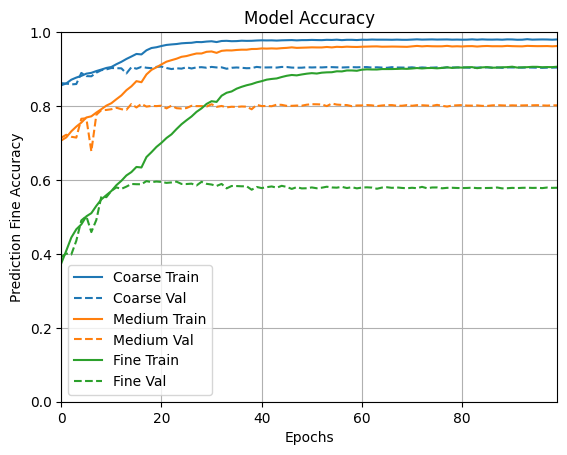

In [18]:
try:
    history_dict = history.history

    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"Coarse": history}, metric = "prediction_coarse_accuracy")
    plotter.plot({"Medium": history}, metric = "prediction_medium_accuracy")
    plotter.plot({"Fine": history}, metric = "prediction_fine_accuracy")
    plt.title("Model Accuracy")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

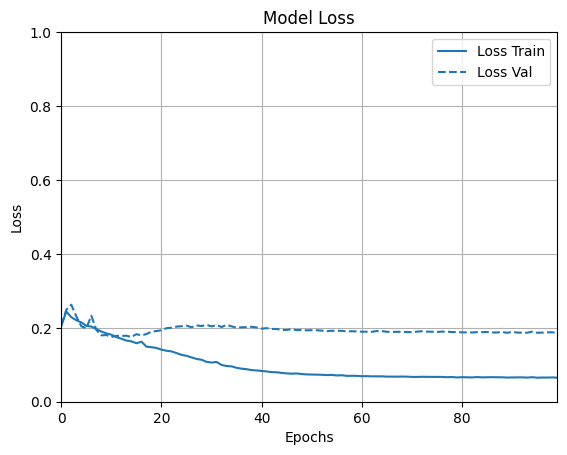

In [19]:
try:
    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"loss": history}, metric = "loss")
    plt.title("Model Loss")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

## Model Analysis

In [20]:
final_model = keras.Model(model.inputs[:1], model.output)

lossfn = models.MarginLoss()
final_model.compile(optimizer='adam', 
                    loss={'prediction_fine' : lossfn,
                          'prediction_medium' : lossfn,
                          'prediction_coarse' : lossfn},

                    loss_weights={'prediction_fine' : lossweight['fine_lw'],
                                  'prediction_medium' : lossweight['medium_lw'],
                                  'prediction_coarse' : lossweight['coarse_lw']},

                    metrics={'prediction_fine': 'accuracy',
                             'prediction_medium': 'accuracy',
                             'prediction_coarse': 'accuracy'
                            }
                   )

In [21]:
results = final_model.evaluate(dataset.test_dataset)
for n in range(len(results)):
    print(str(n+1)+'.',final_model.metrics_names[n], '==>', results[n])
# model_predictions = final_model.predict(dataset.test_dataset)

210/210 [==============================] - 154s 729ms/step - loss: 0.1905 - prediction_coarse_loss: 0.0689 - prediction_medium_loss: 0.1572 - prediction_fine_loss: 0.3380 - prediction_coarse_accuracy: 0.9059 - prediction_medium_accuracy: 0.7989 - prediction_fine_accuracy: 0.5747
1. loss ==> 0.1905306875705719
2. prediction_coarse_loss ==> 0.06889207661151886
3. prediction_medium_loss ==> 0.15720169246196747
4. prediction_fine_loss ==> 0.33797797560691833
5. prediction_coarse_accuracy ==> 0.9058511853218079
6. prediction_medium_accuracy ==> 0.7989029288291931
7. prediction_fine_accuracy ==> 0.5747444033622742


In [22]:
def predict_from_pipeline(model, dataset):
    y_pred_c = []
    y_pred_m = []
    y_pred_f = []
    
    y_true_c = []
    y_true_m = []
    y_true_f = []
    for x, y in dataset:
        batch_pred = model.predict(x)
        
        y_true_c.extend(y[0].numpy().tolist())
        y_true_m.extend(y[1].numpy().tolist())
        y_true_f.extend(y[2].numpy().tolist())
        
        y_pred_c.extend(batch_pred[0].tolist())
        y_pred_m.extend(batch_pred[1].tolist())
        y_pred_f.extend(batch_pred[2].tolist())
        
    return np.array(y_true_c), np.array(y_true_m), np.array(y_true_f), np.array(y_pred_c), np.array(y_pred_m), np.array(y_pred_f)

In [23]:
y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f = predict_from_pipeline(final_model, dataset.test_dataset)

  • Confusion_Matrix 

  • COARSE LEVEL 
[[22398   682]
 [ 1841  1877]]

  • MEDIUM LEVEL 
[[   88    69     3     1     1     5     4   512     0    60]
 [   43  1274     0     1     0     4     2   890     1   110]
 [    1     2     0     0     0     0     0    20     0     1]
 [    2     8     1    28     1     0     0    69     0    10]
 [    2     2     0     0     0     0     0    41     0     4]
 [    6    13     0     1     1     6     0   103     0    14]
 [    2     3     0     0     0     2   429   244     0    15]
 [  117   436     2    10     4     9   102 17558     0   724]
 [    0     2     0     0     0     1     0    15     0     1]
 [   36   126     0     7     1     3    12  1507     0  2026]]

  • FINE LEVEL 
[[467  35  20 ...   3  52   9]
 [ 28 256  14 ...   0   6   1]
 [ 23  37 103 ...   0  13   0]
 ...
 [  6   9   5 ...   0   8   0]
 [ 83  18  10 ...   0 127   1]
 [  6   1   2 ...   0   3 255]]

  • Classification Report 


  • COARSE LEVEL 


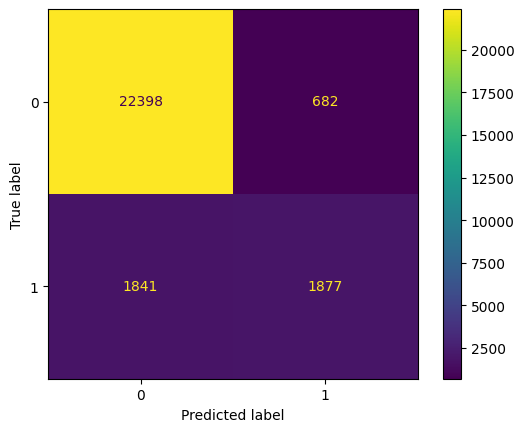

              precision    recall  f1-score   support

           0    0.92405   0.97045   0.94668     23080
           1    0.73349   0.50484   0.59806      3718

    accuracy                        0.90585     26798
   macro avg    0.82877   0.73765   0.77237     26798
weighted avg    0.89761   0.90585   0.89831     26798


  • MEDIUM LEVEL 


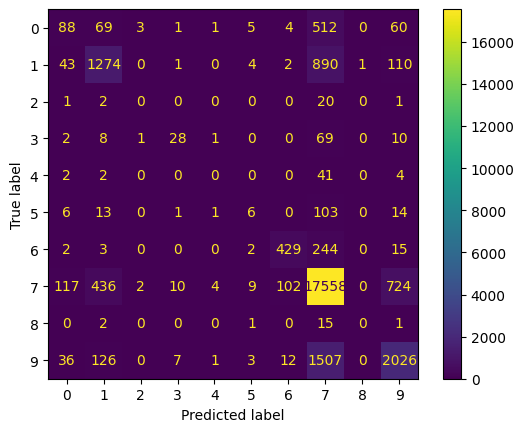

              precision    recall  f1-score   support

           0    0.29630   0.11844   0.16923       743
           1    0.65840   0.54796   0.59812      2325
           2    0.00000   0.00000   0.00000        24
           3    0.58333   0.23529   0.33533       119
           4    0.00000   0.00000   0.00000        49
           5    0.20000   0.04167   0.06897       144
           6    0.78142   0.61727   0.68971       695
           7    0.83773   0.92596   0.87964     18962
           8    0.00000   0.00000   0.00000        19
           9    0.68331   0.54492   0.60631      3718

    accuracy                        0.79890     26798
   macro avg    0.40405   0.30315   0.33473     26798
weighted avg    0.77684   0.79890   0.78288     26798


  • FINE LEVEL 


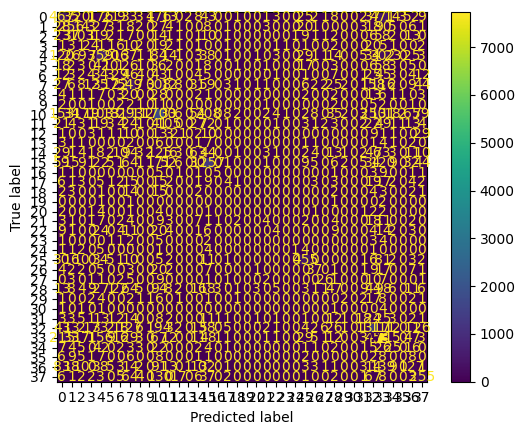

              precision    recall  f1-score   support

           0    0.33238   0.28476   0.30673      1640
           1    0.47232   0.48302   0.47761       530
           2    0.39163   0.32803   0.35702       314
           3    0.21622   0.22642   0.22120       106
           4    0.45613   0.48221   0.46881      1574
           5    0.07634   0.04098   0.05333       244
           6    0.13364   0.10035   0.11462       289
           7    0.34015   0.37246   0.35557      1474
           8    0.00000   0.00000   0.00000        96
           9    0.00000   0.00000   0.00000        30
          10    0.48159   0.51609   0.49824      3294
          11    0.33981   0.24533   0.28494       428
          12    0.29577   0.19811   0.23729       106
          13    0.00000   0.00000   0.00000        31
          14    0.21070   0.10957   0.14416       575
          15    0.62166   0.64067   0.63102      1962
          16    0.45455   0.17241   0.25000        29
          17    0.11765   0

/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/knoor/.conda/envs/tf28_luthin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [24]:
metrics.lvl_wise_metric([y_true_c, y_true_m, y_true_f],
                        [y_pred_c, y_pred_m, y_pred_f])

In [25]:
h_measurements,consistency,exact_match = metrics.hmeasurements([y_true_c, y_true_m, y_true_f],
                                                               [y_pred_c, y_pred_m, y_pred_f],
                                                               dataset.get_tree())
print('\nHierarchical Precision =',h_measurements[0],
      '\nHierarchical Recall =', h_measurements[1],
      '\nHierarchical F1-Score =',h_measurements[2],
      '\nConsistency = ', consistency,
      '\nExact Match = ', exact_match,
     )


Hierarchical Precision = 0.7570689354926984 
Hierarchical Recall = 0.7692116327089086 
Hierarchical F1-Score = 0.7619576265464019 
Consistency =  0.9378311814314501 
Exact Match =  0.5590342562877827
